In [122]:
# ! pip install xlrd
# ! pip install seaborn
# ! pip install imblearn

In [123]:
!python --version

Python 3.9.19


Introduction
In 1990, the Taiwanese government permitted the formation of new banks. Initially, these banks conducted business with real estate companies, but as the market became saturated, they shifted to the credit card business. To capture market share, banks over-issued credit cards to unqualified applicants. This led to many cardholders accumulating significant credit card debts, resulting in a high rate of defaults. A credit card default occurs when a cardholder fails to meet their repayment obligations, causing a crisis in consumer finance confidence.
The purpose of this project is to predict which customers are likely to default on their credit card payments. By identifying potential defaulters, banks can take proactive measures to mitigate losses.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_excel('datasets/default_of_credit_card_clients.xls',header=1,index_col='ID')

In [51]:
# Display the first few rows of the dataframe
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   
3       0  ...      14331      14948      15549      1518      1500      1000   
4       0  ...      28314      28959      29547      2000      2019      1200   
5       0  ...      20940      19146      19131      2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
ID                                                            
1          0         0         0                           1  
2       1000         0      2000                           1  
3       1000      1000      5000                           0  
4       1100      1069      1000                           0  
5       9000       689       679                           0  

[5 rows x 24 columns]

### Data Description
The dataset contains information about 30,000 credit card clients from a Taiwanese bank. Each row represents a customer, with features including demographic information, credit limit, billing amounts, and payment history. The target variable is DEFAULT, which indicates whether the customer defaulted on their payment (1) or not (0).

** Key features in the dataset include: **
•	LIMIT_BAL: Amount of given credit (includes both the individual consumer credit and his/her family).
•	SEX: Gender (1 = male, 2 = female).
•	EDUCATION: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).
•	MARRIAGE: Marital status (1 = married, 2 = single, 3 = others).
•	AGE: Age of the customer.
•	PAY_1 to PAY_6: History of past payment status.
•	BILL_AMT1 to BILL_AMT6: Amount of bill statement.
•	PAY_AMT1 to PAY_AMT6: Amount paid in previous month.


In [52]:
# read and creation of dataframe
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   
3       0  ...      14331      14948      15549      1518      1500      1000   
4       0  ...      28314      28959      29547      2000      2019      1200   
5       0  ...      20940      19146      19131      2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
ID                                         
1          0         0         0        1  
2       1000         0      2000        1  
3       1000      1000      5000        0  
4       1100      1069      1000        0  
5       9000       689       679        0  

[5 rows x 24 columns]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

In [54]:
df.shape

(30000, 24)

In [55]:
# Check for missing values
print(df.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [56]:
# Check for data types
print(df.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object


In [57]:
# Get descriptive statistics
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       DEFAULT  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

In [58]:
df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [59]:
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [60]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")



Dataset size before:	30000
Dataset size after:	29601


In [61]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29601.000000  29601.000000  29601.000000  29601.000000  29601.000000   
mean      -0.014932     -0.131313     -0.163440     -0.218303     -0.263978   
std        1.124503      1.199642      1.199793      1.172220      1.136217   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  29601.000000  
mean      -0.287558  
std        1.152206  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [62]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

In [63]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

# <0 has been changed to -1 and >=0 has been incremented by 1 so that the value ranges from (1,9)

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29601.000000  29601.000000  29601.000000  29601.000000  29601.000000   
mean       0.794770      0.666329      0.638492      0.591939      0.550894   
std        1.339224      1.397190      1.389153      1.350751      1.309342   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        9.000000      9.000000      9.000000      9.000000      9.000000   

              PAY_6  
count  29601.000000  
mean       0.520759  
std        1.325013  
min       -1.000000  
25%       -1.000000  
50%        1.000000  
75%        1.000000  
max        9.000000

In [64]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   29601.000000   29601.000000  2.960100e+04   29601.000000   
mean    50957.432012   48942.189554  4.680320e+04   43122.554204   
std     73370.242404   70923.985151  6.912389e+04   64196.383913   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3528.000000    2970.000000  2.652000e+03    2329.000000   
50%     22259.000000   21050.000000  2.003500e+04   19005.000000   
75%     66623.000000   63497.000000  5.983000e+04   54271.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   29601.000000   29601.000000  
mean    40235.545184   38858.449816  
std     60699.344884   59519.893043  
min    -81334.000000 -339603.000000  
25%      1780.000000    1278.000000  
50%     18091.000000   17118.000000  
75%     50072.000000   49121.000000  
max    927171.000000  961664.000000

In [65]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   29601.000000  2.960100e+04   29601.000000   29601.000000   
mean     5649.560319  5.894788e+03    5198.415898    4828.659268   
std     16568.264941  2.308919e+04   17580.914806   15711.057992   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.250000e+02     390.000000     298.000000   
50%      2100.000000  2.007000e+03    1800.000000    1500.000000   
75%      5005.000000  5.000000e+03    4500.000000    4014.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   29601.000000   29601.000000  
mean     4795.032735    5181.326374  
std     15244.217154   17657.260739  
min         0.000000       0.000000  
25%       259.000000     138.000000  
50%      1500.000000    1500.000000  
75%      4042.000000    4000.000000  
max    426529.000000  528666.000000

In [66]:
df['DEFAULT'].value_counts()

DEFAULT
0    22996
1     6605
Name: count, dtype: int64

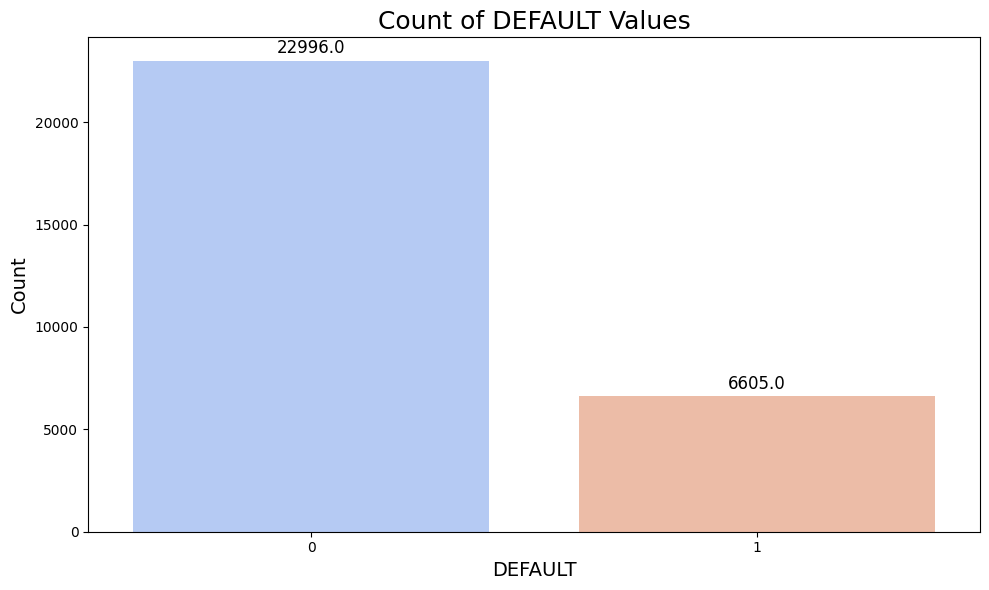

In [67]:
# Assuming 'df' is your dataframe and 'DEFAULT' is the column you're examining:
value_counts = df['DEFAULT'].value_counts()

# Convert the value counts to a DataFrame:
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['DEFAULT', 'Count']  # Renaming the columns for clarity

# Start the plot with a larger figure size for better readability
plt.figure(figsize=(10, 6))

# Create the bar plot with additional aesthetics
barplot = sns.barplot(
    x='DEFAULT', 
    y='Count', 
    data=value_counts_df,
    palette='coolwarm'  # Color palette for visual appeal
)

# Set title and labels with a larger font size for clarity
plt.title('Count of DEFAULT Values', fontsize=18)
plt.xlabel('DEFAULT', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate the bars with the exact count values
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.1f'),  # Format the count to one decimal point
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
        ha = 'center',  # Center the text horizontally
        va = 'center',  # Center the text vertically
        xytext = (0, 9),  # Position text slightly above the bar
        textcoords = 'offset points',
        fontsize=12
    )

# Improve the layout and display the plot
plt.tight_layout()
plt.show()

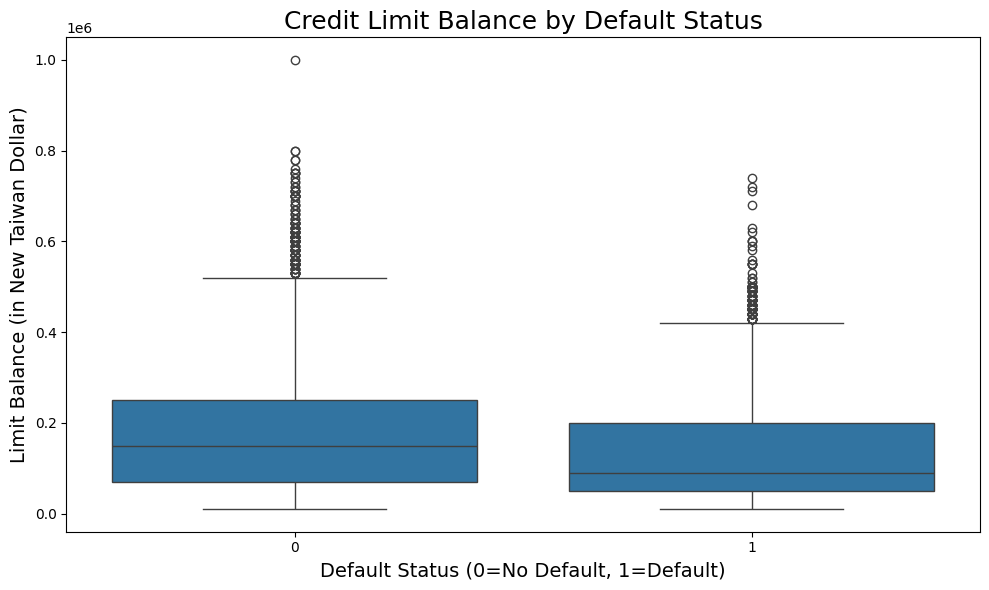

In [68]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of LIMIT_BAL for each DEFAULT category
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df)

# Set the title and labels of the plot
plt.title('Credit Limit Balance by Default Status', fontsize=18)
plt.xlabel('Default Status (0=No Default, 1=Default)', fontsize=14)
plt.ylabel('Limit Balance (in New Taiwan Dollar)', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

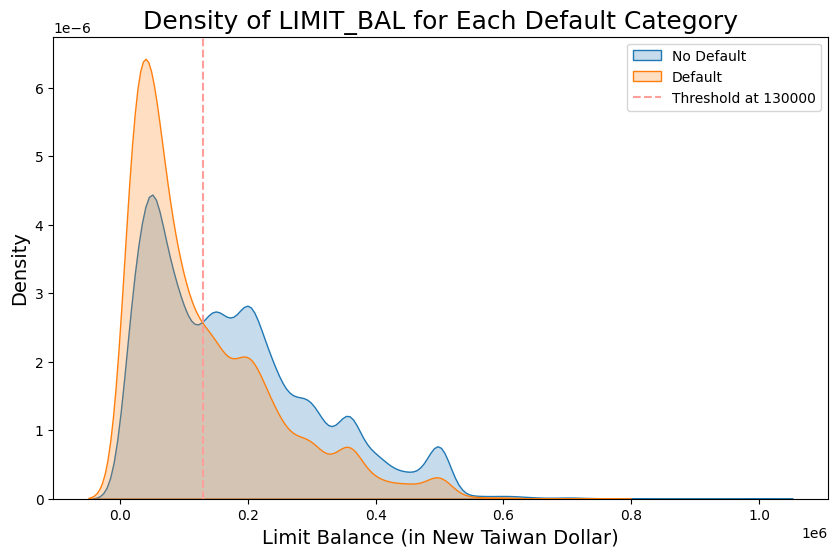

In [69]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the KDE plot for non-defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 0]['LIMIT_BAL'], label = 'No Default', shade=True)

# Draw the KDE plot for defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 1]['LIMIT_BAL'], label = 'Default', shade=True)

# Add a title and labels
plt.title('Density of LIMIT_BAL for Each Default Category', fontsize=18)
plt.xlabel('Limit Balance (in New Taiwan Dollar)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add vertical line to denote a potential threshold (if you have one in mind)
threshold = 130000  # Example threshold
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold at {threshold}')

# Show the legend and plot
plt.legend()
plt.show()

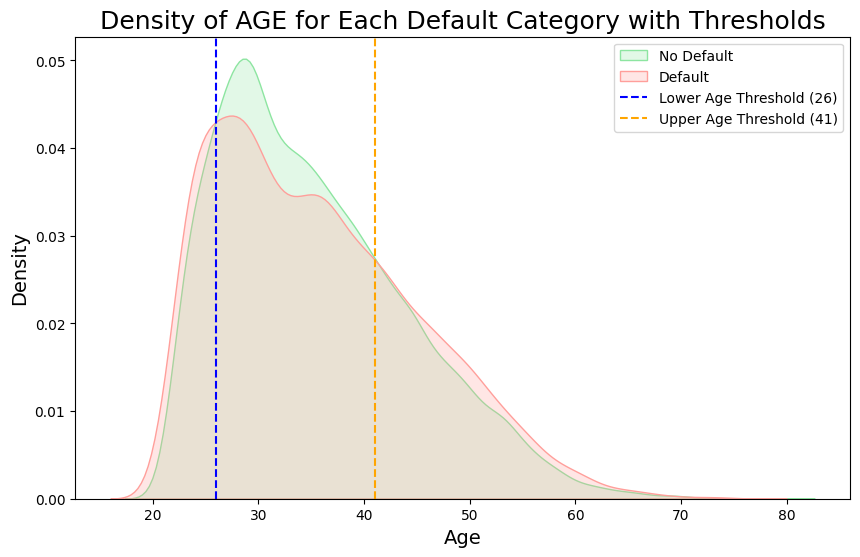

In [70]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the KDE plot for non-defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 0]['AGE'], label='No Default', shade=True, color='g')

# Draw the KDE plot for defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 1]['AGE'], label='Default', shade=True, color='r')

# Add vertical lines for thresholds
threshold_low = 26
threshold_high = 41
plt.axvline(x=threshold_low, color='blue', linestyle='--', label='Lower Age Threshold (26)')
plt.axvline(x=threshold_high, color='orange', linestyle='--', label='Upper Age Threshold (41)')

# Add a title and labels
plt.title('Density of AGE for Each Default Category with Thresholds', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


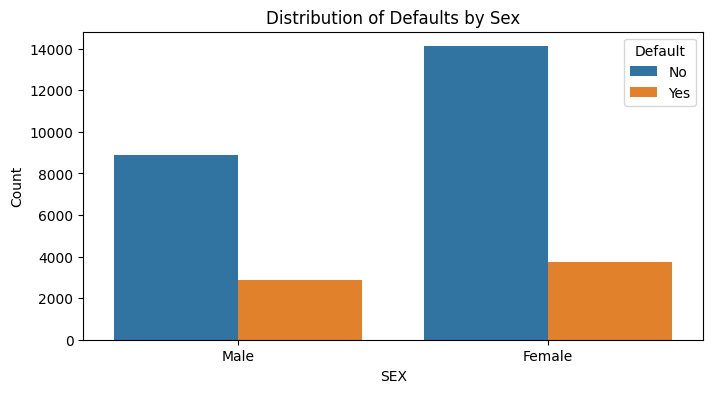

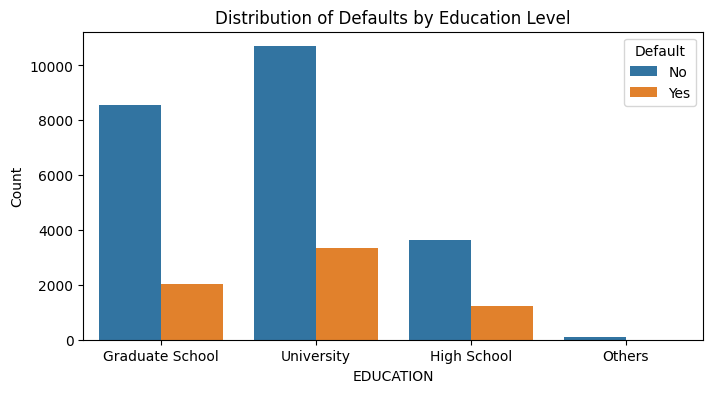

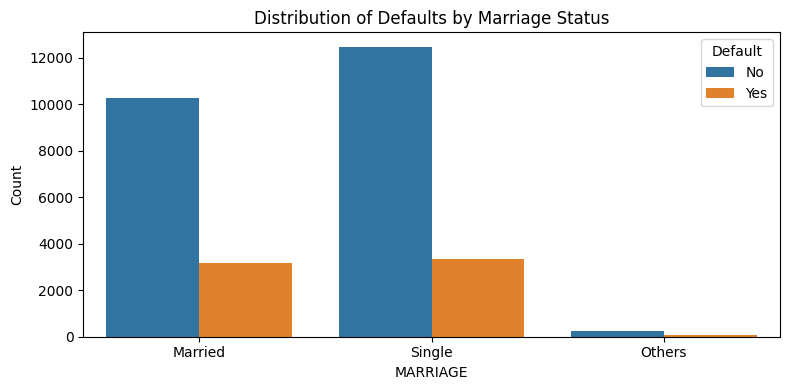

In [71]:
def plot_categorical_distribution(dataframe, column_name, title, hue_order, labels_dict):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=column_name, hue='DEFAULT', data=dataframe, hue_order=hue_order)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    
    # Rename legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles, ['No', 'Yes'], title='Default')

    # Rename x-axis category labels
    ax.set_xticklabels([labels_dict.get(x.get_text(), x.get_text()) for x in ax.get_xticklabels()])

# Labels dictionaries
sex_labels = {'1': 'Male', '2': 'Female'}
education_labels = {'1': 'Graduate School', '2': 'University', '3': 'High School', '4': 'Others'}
marriage_labels = {'1': 'Married', '2': 'Single', '3': 'Others'}

# Plot for SEX
plot_categorical_distribution(df, 'SEX', 'Distribution of Defaults by Sex', hue_order=[0, 1], labels_dict=sex_labels)

# Plot for EDUCATION
plot_categorical_distribution(df, 'EDUCATION', 'Distribution of Defaults by Education Level', hue_order=[0, 1], labels_dict=education_labels)

# Plot for MARRIAGE
plot_categorical_distribution(df, 'MARRIAGE', 'Distribution of Defaults by Marriage Status', hue_order=[0, 1], labels_dict=marriage_labels)

# Show the plots
plt.tight_layout()
plt.show()

Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.
No. of defaulters have a higher proportion of educated people (graduate school and university)
No. of defaulters have a higher proportion of Singles.

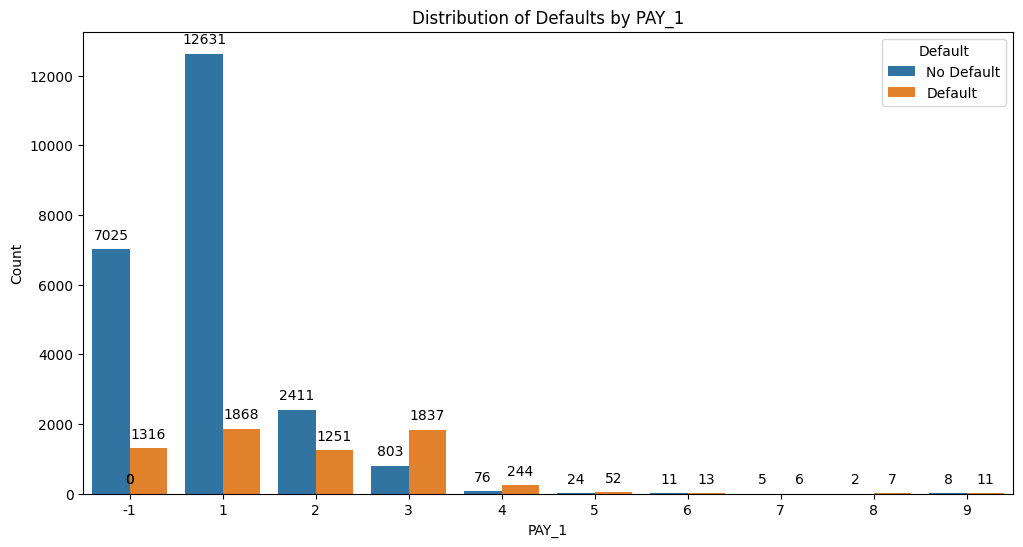

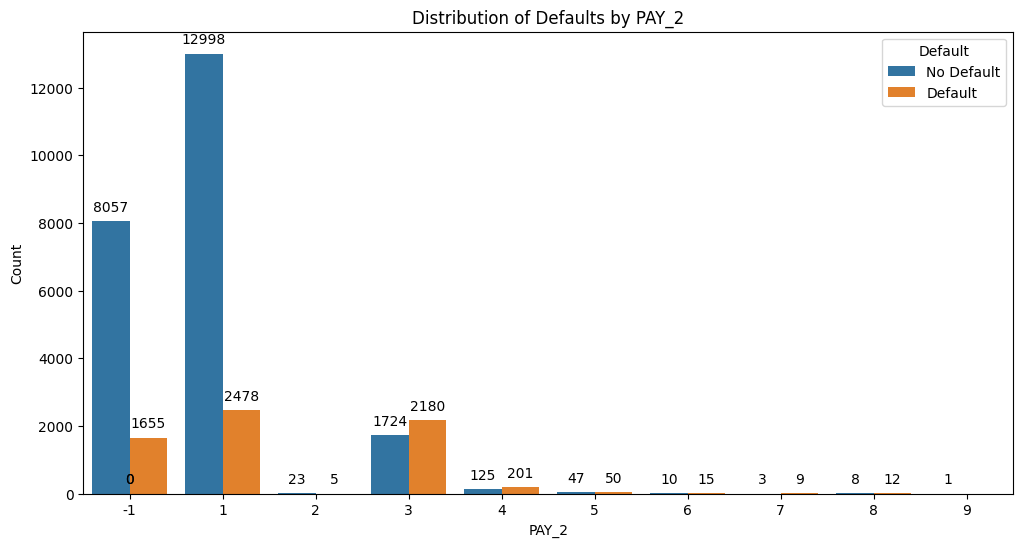

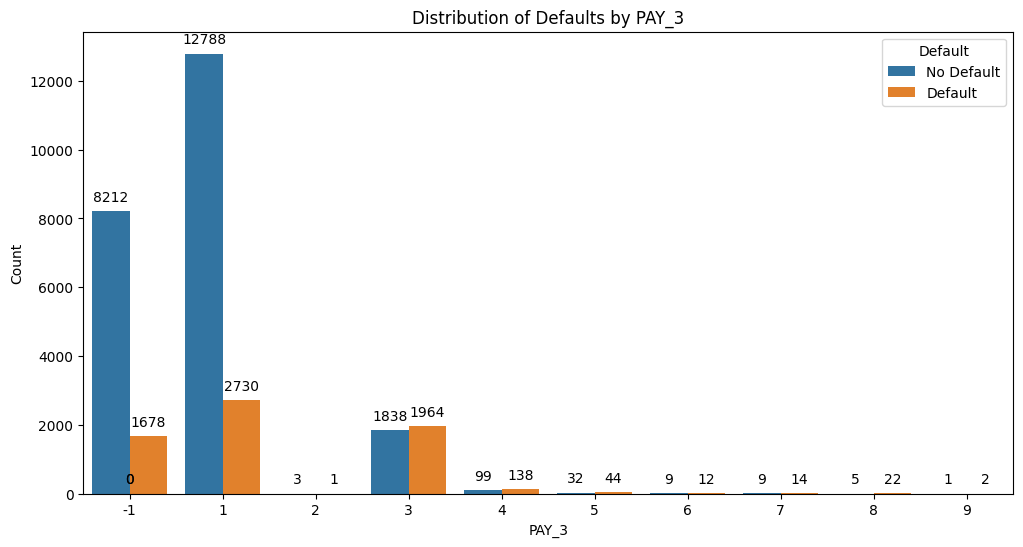

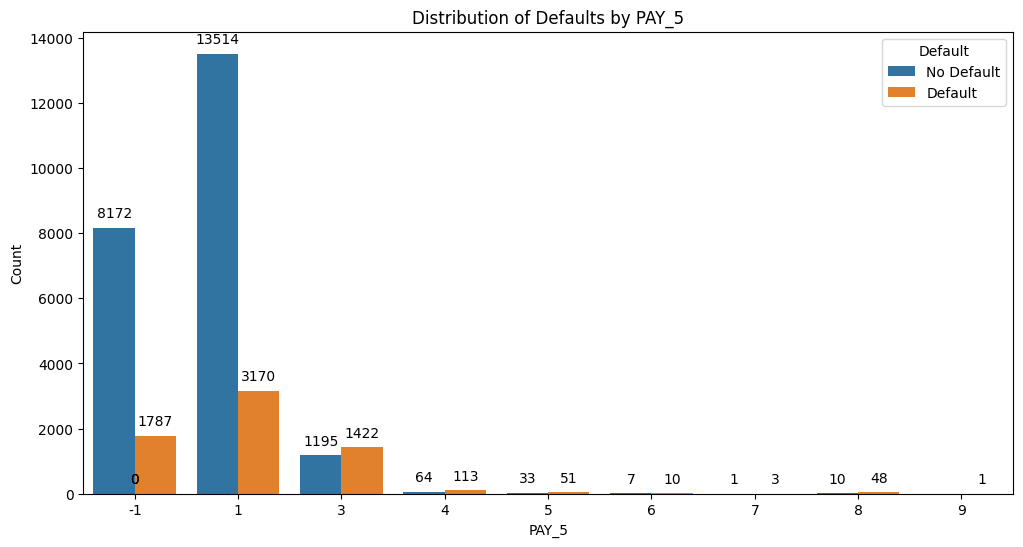

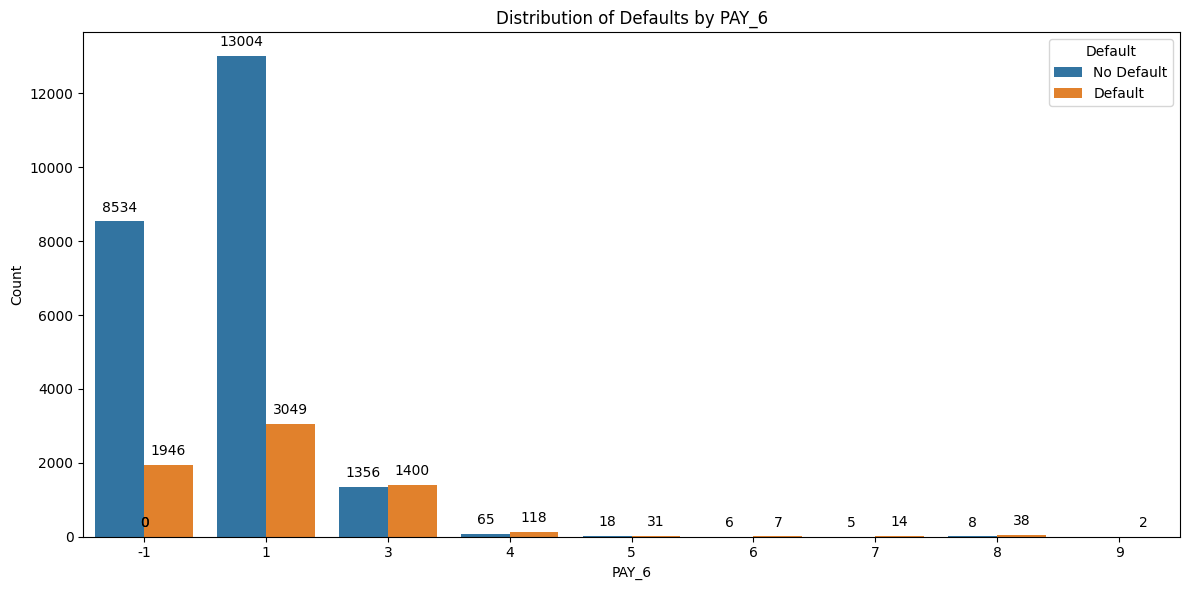

In [72]:
# Define a function to create annotated countplots for payment status
def plot_payment_distribution(dataframe, column_name, title):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column_name, hue='DEFAULT', data=dataframe)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Count')

    # Rename legend labels
    ax.legend(title='Default', loc='upper right', labels=['No Default', 'Default'])

    # Annotate bars with count information
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Annotate with the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                    ha='center', va='center',  # Center the text horizontally and vertically
                    xytext=(0, 10),  # Offset text by 10 points vertically
                    textcoords='offset points',  # Interpret xytext as offset in points
                    fontsize=10)

# Plot for each PAY attribute
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in pay_columns:
    plot_payment_distribution(df, column, f'Distribution of Defaults by {column}')

# Show the plots
plt.tight_layout()
plt.show()

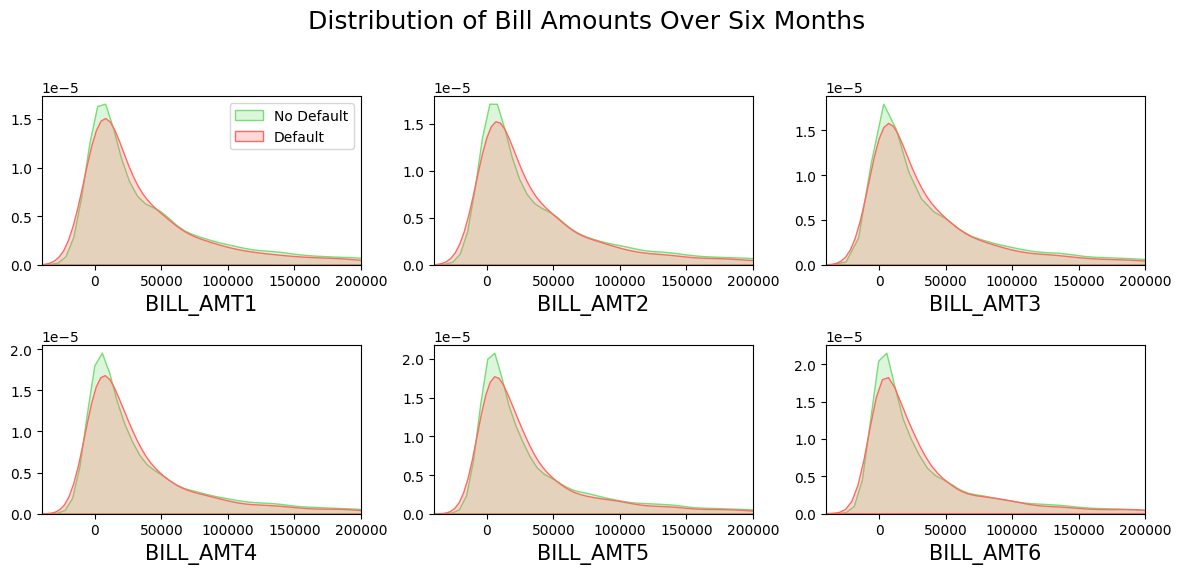

In [73]:
# Define the figure size and setup
plt.figure(figsize=(12, 6))

BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Loop through each BILL_AMT column and create a subplot for each
for i, col in enumerate(BILL_AMT_cols):    
    ax = plt.subplot(2, 3, i + 1)    
    sns.kdeplot(df.loc[df['DEFAULT'] == 0, col], label='No Default', color='#77DD76', shade=True)
    sns.kdeplot(df.loc[df['DEFAULT'] == 1, col], label='Default', color='#FF6962', shade=True)
    plt.xlim(-40000, 200000)
    plt.ylabel('')
    plt.xlabel(col, fontsize=15)

    # Only add the legend to the first plot to avoid redundancy
    if i == 0:
        plt.legend()
    else:
        # Check if the legend exists before trying to remove it
        legend = ax.get_legend()
        if legend:
            legend.remove()

# Add a main title and adjust the layout
plt.suptitle('Distribution of Bill Amounts Over Six Months', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title

# Save the figure before showing it
# plt.savefig('images/continuousBILLAMT.svg')
plt.show()

Comparison Between Defaults and Non-Defaults:
Defaulted Customers: For customers who have defaulted (DEFAULT = 1), the KDE plot can reveal common bill amount ranges. A higher density in lower bill amounts could indicate that customers with lower bill amounts are more likely to default, or vice versa.
Non-Defaulted Customers: Similarly, examining the KDE plot for customers who have not defaulted can highlight the typical bill amounts where default is less likely.

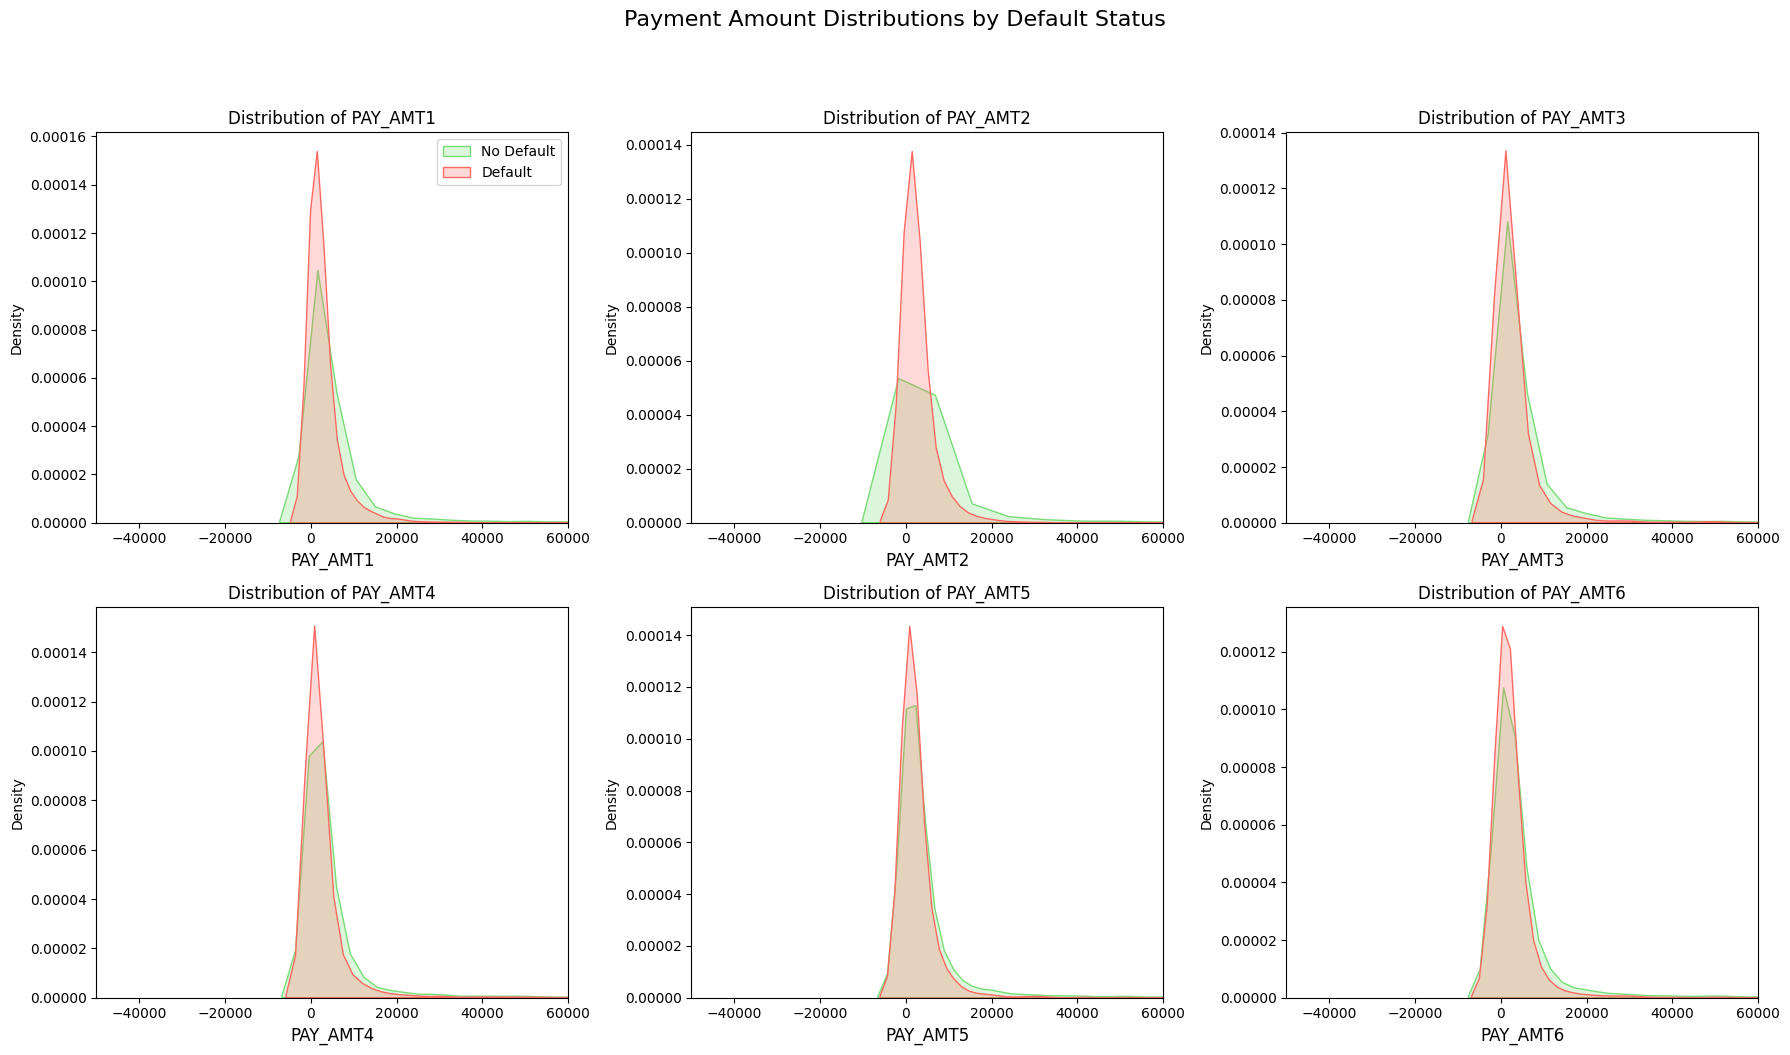

In [74]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(18,10))  # Adjust the size to fit your screen resolution

for i, col in enumerate(PAY_AMT_cols):    
    ax = plt.subplot(2, 3, i + 1)    
    sns.kdeplot(df.loc[df['DEFAULT'] == 0, col], label='No Default', shade=True, color='#77DD76')
    sns.kdeplot(df.loc[df['DEFAULT'] == 1, col], label='Default', shade=True, color='#FF6962')
    plt.xlim(-50000, 60000)  # Payment amounts usually start at 0
    plt.xlabel(col, fontsize=12)
    plt.title(f'Distribution of {col}')  # Add a title to each subplot for clarity
    if i == 0:
        plt.legend()  # Only show legend in the first plot to reduce clutter
    else:
        ax.legend([],[], frameon=False)  # Remove legends for subsequent plots

plt.suptitle('Payment Amount Distributions by Default Status', fontsize=16, y=1.05)  # Add an overall title for the figure
plt.tight_layout()  # Adjust the layout
plt.show()

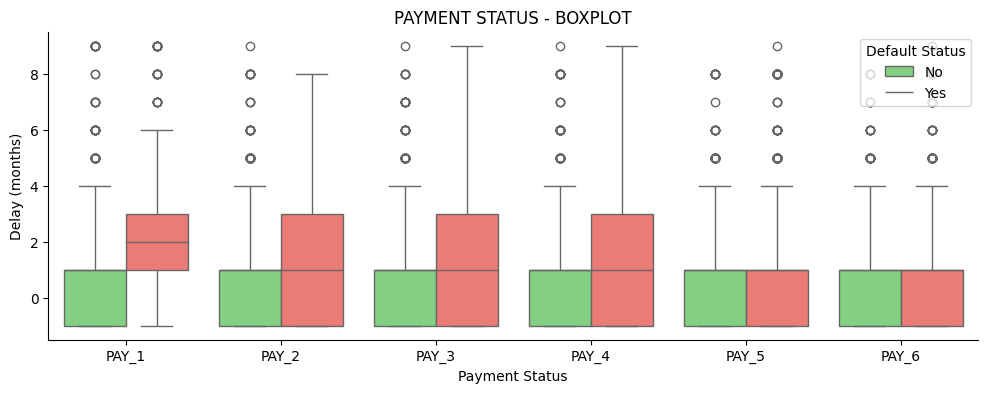

In [75]:
# Assuming df is your main DataFrame
repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment, 
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')

plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend(title='Default Status', loc='upper right', labels=['No', 'Yes'])
sns.despine()  # This removes the top and right spines
# plt.savefig('images/BoxplotPAY.svg')
plt.show()

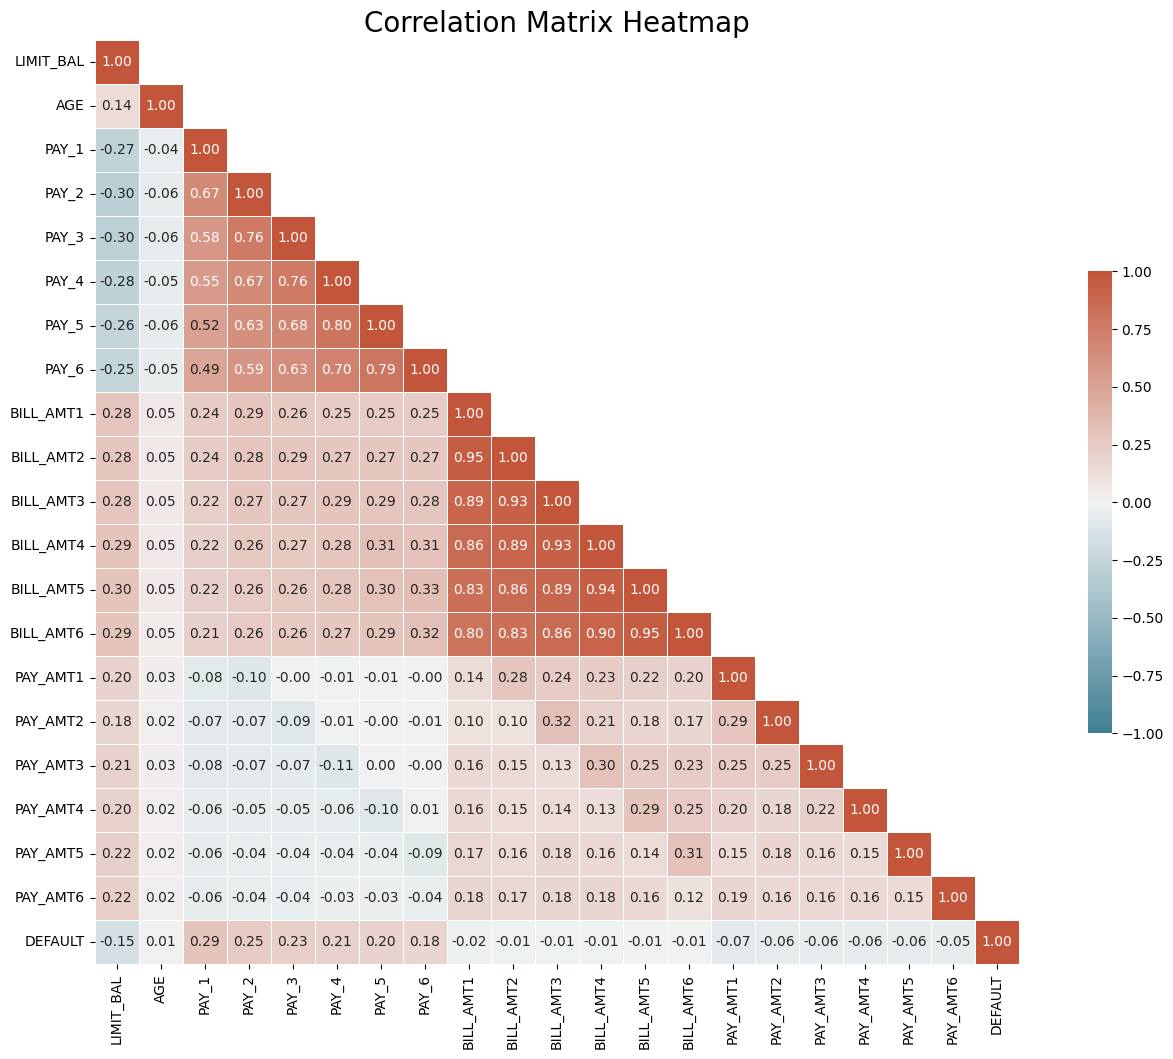

In [76]:
# Calculate correlation matrix for numerical columns
numeric = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Create the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, 
            linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, 
            annot=True, fmt=".2f")

# Set the title and adjust the title size
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Adjust the tick label size for both axes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the heatmap as an SVG file
# plt.savefig('images/correlation.svg')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


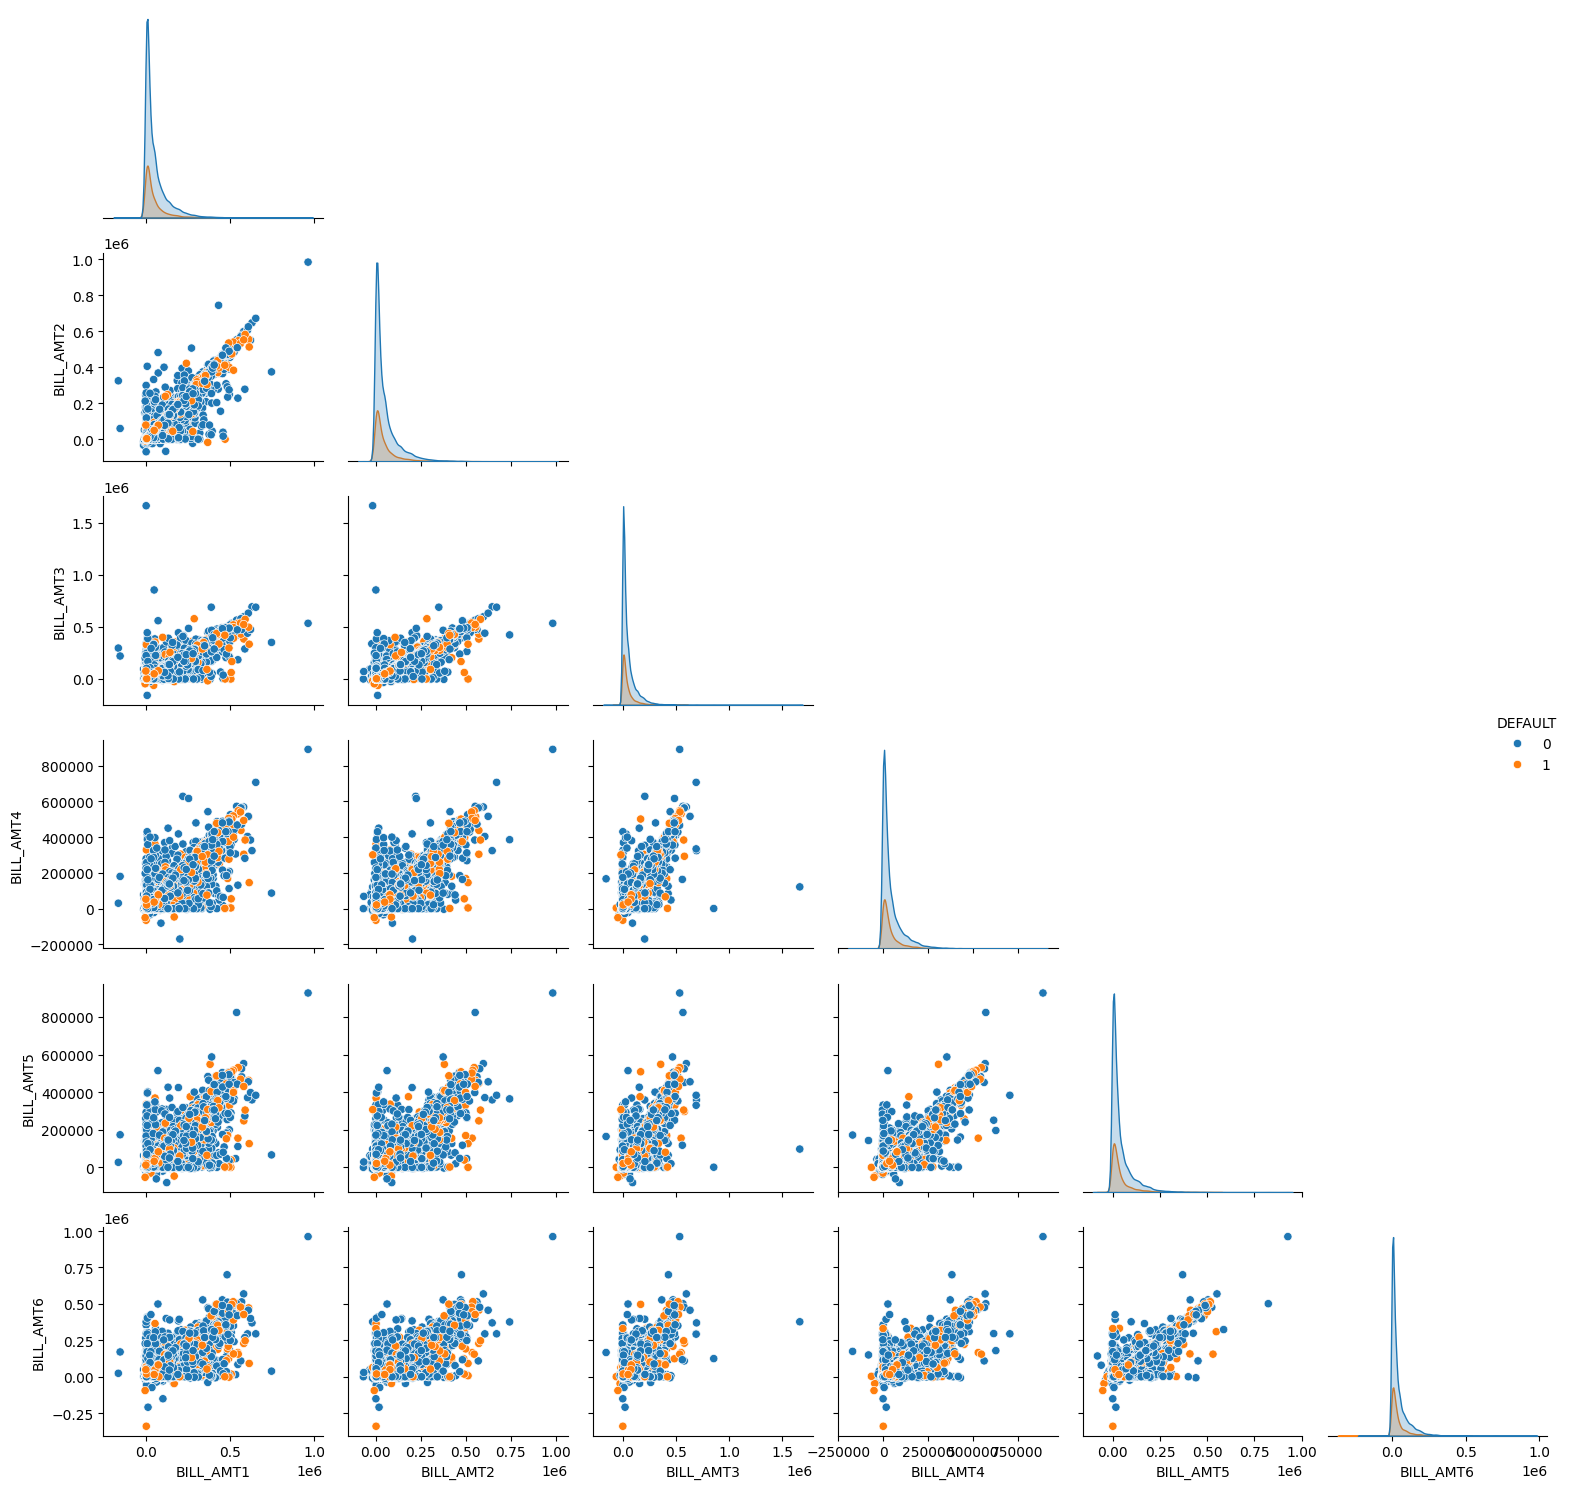

In [77]:
columns_to_plot = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEFAULT']
pair_plot = sns.pairplot(df[columns_to_plot], hue='DEFAULT', diag_kind='kde', corner=True)

# Removing the legend can be done by accessing the legend and setting it to None
plt.legend().set_visible(False)

# Adjust the layout to prevent overlap and improve visibility
plt.tight_layout()

# Save the plot as an image file
plt.savefig('images/pairplotBILLAMT.svg')

## Normality Check

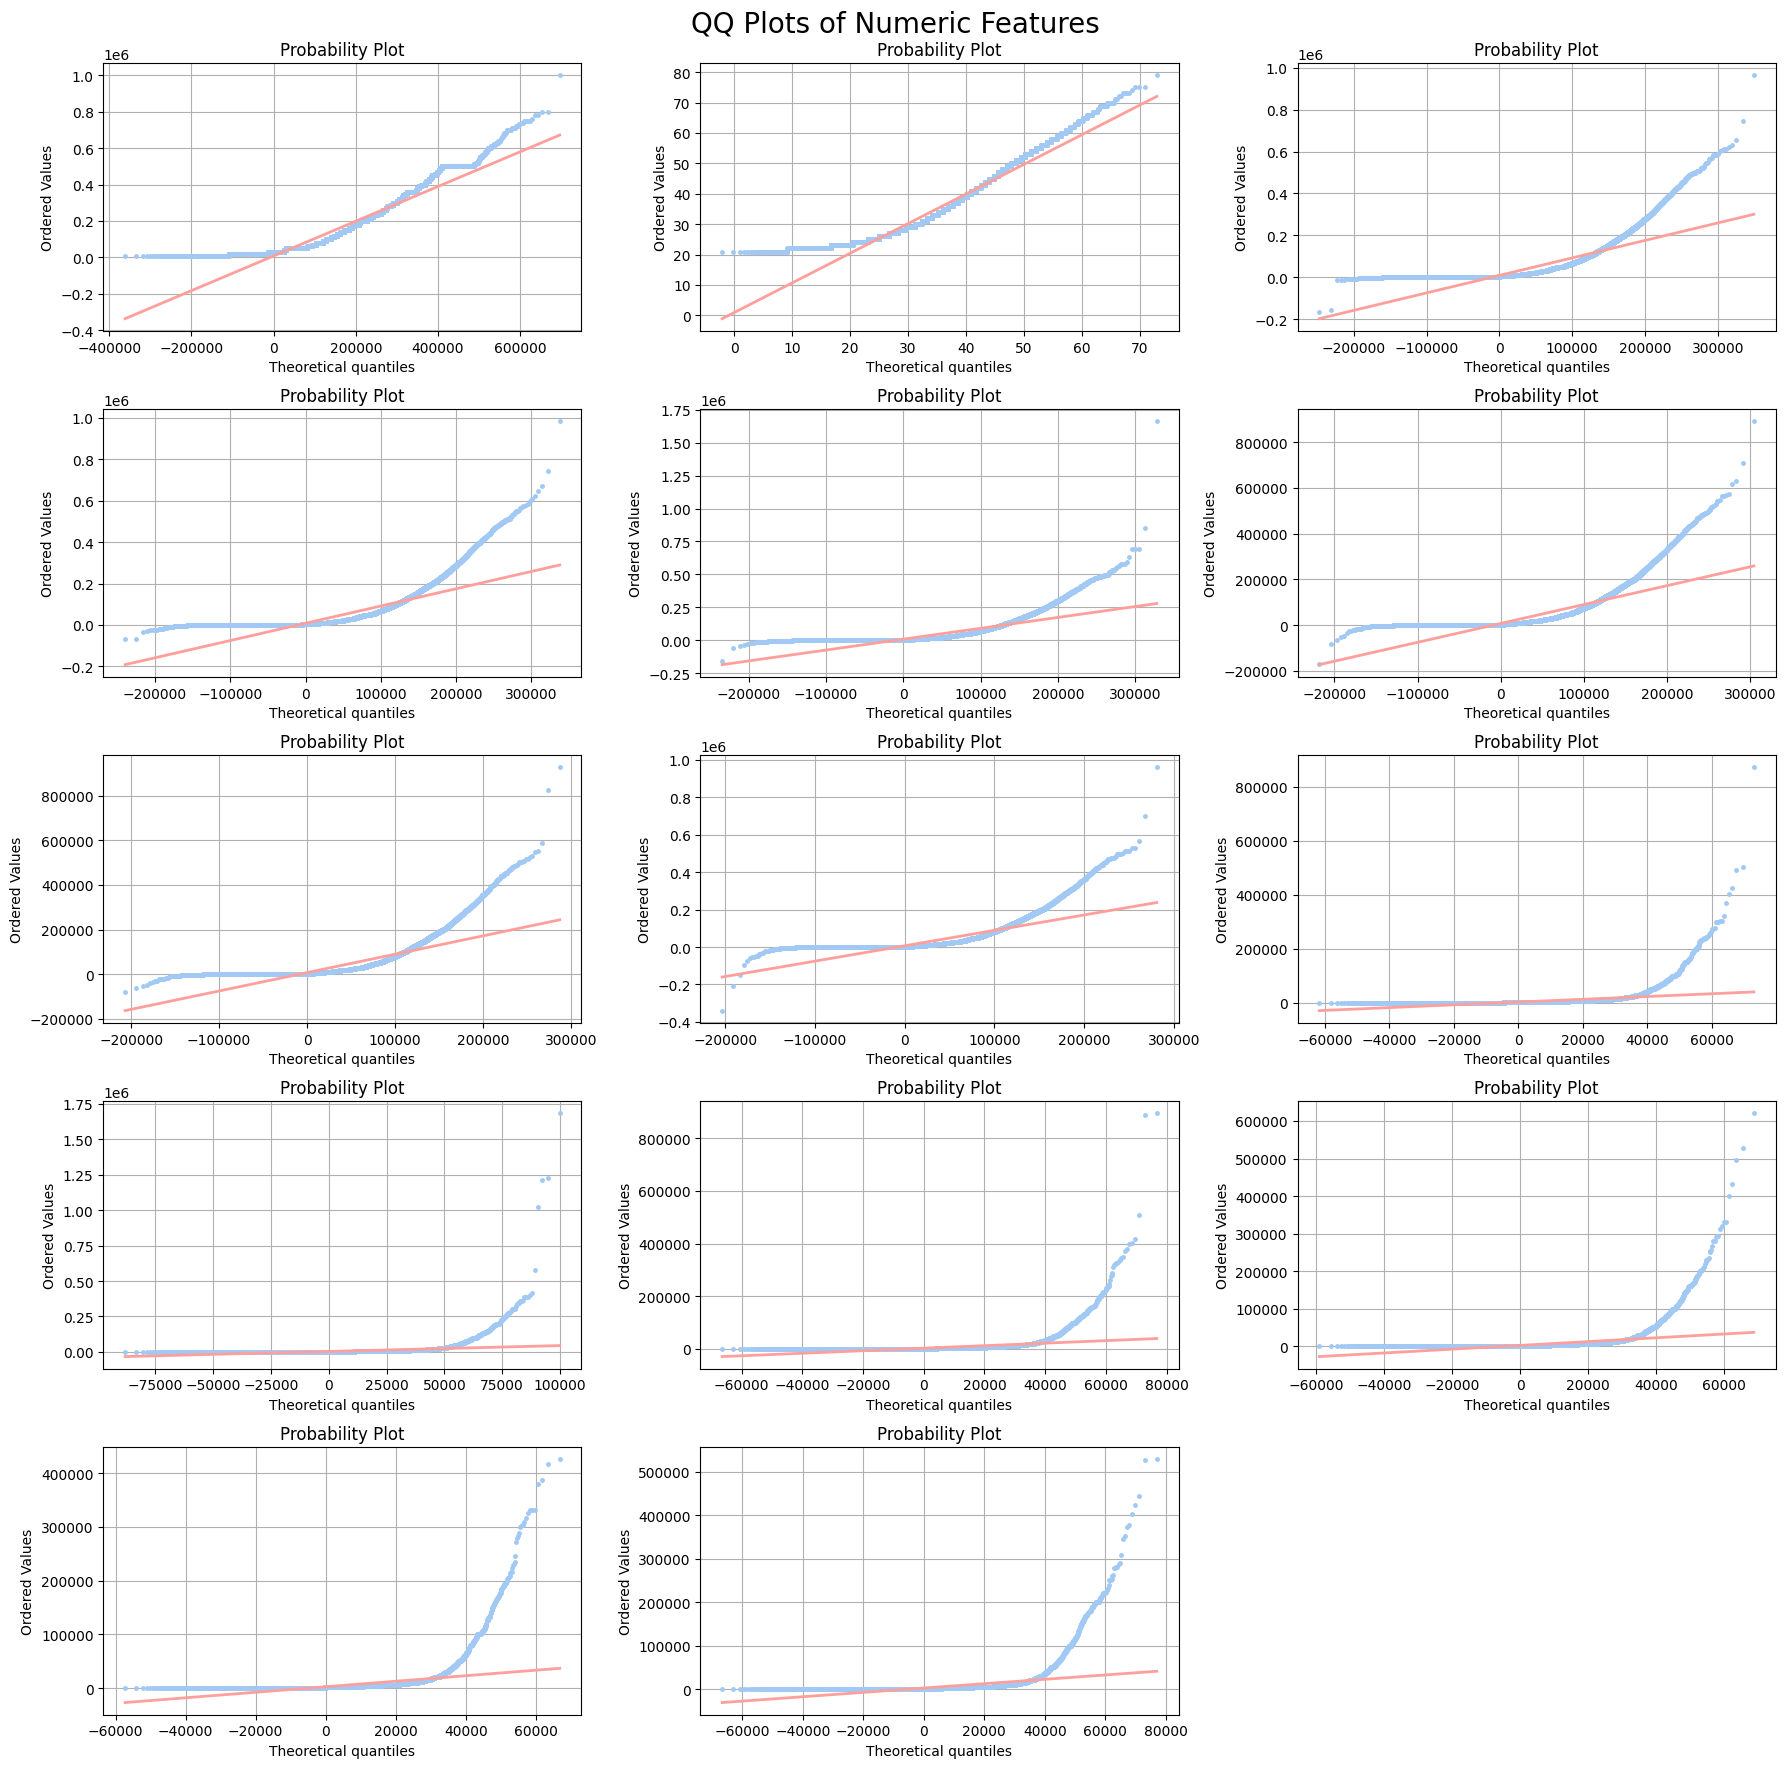

In [78]:
# Set Seaborn color codes to 'pastel'
sns.set_color_codes('pastel')

# Define the list of numeric features
numeric = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Calculate the number of rows and columns for subplots
num_vars = len(numeric)
num_cols = 3
num_rows = num_vars // num_cols + (num_vars % num_cols > 0)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Loop through the numeric features and create a QQ plot for each
for n, feature in enumerate(numeric):
    row, col = divmod(n, num_cols)
    stats.probplot(df[feature], dist='norm', sparams=(df[feature].mean(), df[feature].std()), plot=axs[row, col])
    axs[row, col].get_lines()[0].set_marker('.')
    axs[row, col].get_lines()[0].set_markersize(5)  # Increase marker size for better visibility
    axs[row, col].get_lines()[1].set_linewidth(2)  # Set the linewidth of the reference line
    axs[row, col].grid(True)  # Turn on the grid

# Turn off any remaining unused axes
for n in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs.flatten()[n])

# Adjust layout to minimize overlap
fig.tight_layout()

# Add a figure title
fig.suptitle('QQ Plots of Numeric Features', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust top to fit figure title

# Save the figure
plt.savefig('images/QQplot.png')

# Show the plot
plt.show()

In [79]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      3      3     -1     -1   
2      120000    2          2         2   26     -1      3      1      1   
3       90000    2          2         2   34      1      1      1      1   
4       50000    2          2         1   37      1      1      1      1   
5       50000    1          2         1   57     -1      1     -1      1   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -1  ...          0          0          0         0       689         0   
2       1  ...       3272       3455       3261         0      1000      1000   
3       1  ...      14331      14948      15549      1518      1500      1000   
4       1  ...      28314      28959      29547      2000      2019      1200   
5       1  ...      20940      19146      19131      2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
ID                                         
1          0         0         0        1  
2       1000         0      2000        1  
3       1000      1000      5000        0  
4       1100      1069      1000        0  
5       9000       689       679        0  

[5 rows x 24 columns]

In [80]:
df['SEX'].unique()

array([2, 1])

In [81]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [82]:
df['MARRIAGE'].unique()

array([1, 2, 3])

In [83]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype(int)
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype(int)
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype(int)
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype(int)
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype(int)
df.drop('MARRIAGE', axis=1, inplace=True)

# Display the first few rows of the dataframe
df.head()


LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
ID                                                                        
1       20000   24      3      3     -1     -1     -1     -1       3913   
2      120000   26     -1      3      1      1      1      3       2682   
3       90000   34      1      1      1      1      1      1      29239   
4       50000   37      1      1      1      1      1      1      46990   
5       50000   57     -1      1     -1      1      1      1       8617   

    BILL_AMT2  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  \
ID             ...                                                    
1        3102  ...         0         0         0         0        1   
2        1725  ...      1000      1000         0      2000        1   
3       14027  ...      1000      1000      1000      5000        0   
4       48233  ...      1200      1100      1069      1000        0   
5        5670  ...     10000      9000       689       679        0   

    GRAD_SCHOOL  UNIVERSITY  HIGH_SCHOOL  MALE  MARRIED  
ID                                                       
1             0           1            0     0        1  
2             0           1            0     0        0  
3             0           1            0     0        0  
4             0           1            0     0        1  
5             0           1            0     1        1  

[5 rows x 26 columns]

In [84]:
# Adding derived features to the dataframe

# df['AVERAGE_MONTHLY_SPEND'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

df['ON_TIME_PAYMENT_RATIO'] = (df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] <= 0).sum(axis=1) / 6
df['MAX_UTILIZATION_RATIO'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].max(axis=1) / df['LIMIT_BAL']


In [85]:
# df['Utilization_Ratio1'] = df['BILL_AMT1'] / df['LIMIT_BAL']
# df['Utilization_Ratio2'] = df['BILL_AMT2'] / df['LIMIT_BAL']
# df['Utilization_Ratio3'] = df['BILL_AMT3'] / df['LIMIT_BAL']
# df['Utilization_Ratio4'] = df['BILL_AMT4'] / df['LIMIT_BAL']
# df['Utilization_Ratio5'] = df['BILL_AMT5'] / df['LIMIT_BAL']
# df['Utilization_Ratio6'] = df['BILL_AMT6'] / df['LIMIT_BAL']
#  df['AVG_UTILIZATION_RATIO'] = df[['Utilization_Ratio1', 'Utilization_Ratio2', 'Utilization_Ratio3', 'Utilization_Ratio4', 'Utilization_Ratio5', 'Utilization_Ratio6']].mean(axis=1)


In [86]:
# df.drop(['Utilization_Ratio1','Utilization_Ratio2','Utilization_Ratio3','Utilization_Ratio4','Utilization_Ratio5','Utilization_Ratio6'],axis=1)

In [87]:
# Defining the features and target variable
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1)

# Splitting the dataset into training and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)

# Print training and test set shapes and counts
print(f'Training set shape: {X_train_raw.shape}')
print(f'- Defaulters: {y_train.sum()}')
print(f'- Non-defaulters: {len(y_train) - y_train.sum()}')
print(f'Test set shape: {X_test_raw.shape}')
print(f'- Defaulters: {y_test.sum()}')
print(f'- Non-defaulters: {len(y_test) - y_test.sum()}')

Training set shape: (22200, 27)
- Defaulters: 4954
- Non-defaulters: 17246
Test set shape: (7401, 27)
- Defaulters: 1651
- Non-defaulters: 5750


### Feature Scaling

#### using min max scaler

In [88]:
# Initialize the scaler
scaler = MinMaxScaler()

# Create copies of the raw training and test data
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

# List of column types with similar processing needs
columns_list = [('LIMIT_BAL', 'AGE')] + [('PAY_' + str(i), 'BILL_AMT' + str(i), 'PAY_AMT' + str(i)) for i in range(1, 7)]

# Apply MinMax scaling
for columns in columns_list:
    for column in columns:
        # Fit the scaler on the training data and transform both train and test data.
        X_train_norm[column] = scaler.fit_transform(X_train_raw[column].values.reshape(-1, 1))
        X_test_norm[column] = scaler.transform(X_test_raw[column].values.reshape(-1, 1))

# Note: The first tuple in columns_list is processed separately here to illustrate handling of different column types or special cases.

#### using robust scaler

In [89]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Create copies of the raw training and test data
X_train_rob = X_train_raw.copy()
X_test_rob = X_test_raw.copy()

# List of all columns that you want to scale
columns_list = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Apply Robust scaling
for column in columns_list:
    # Fit the scaler on the training data and transform both train and test data.
    X_train_rob[column] = scaler.fit_transform(X_train_raw[column].values.reshape(-1, 1))
    X_test_rob[column] = scaler.transform(X_test_raw[column].values.reshape(-1, 1))

# Note: RobustScaler is used here as it is less sensitive to outliers in the data.


#### using standard scaler

In [90]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Create copies of the raw training and test data
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

# List of column groups to scale
column_groups = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Scale each column group
for col in column_groups:
    # Fit the scaler on the training data and transform both train and test data.
    X_train_std[col] = scaler.fit_transform(X_train_raw[col].values.reshape(-1, 1))
    X_test_std[col] = scaler.transform(X_test_raw[col].values.reshape(-1, 1))

# Note: This method ensures that the scaler is fitted only on training data to prevent data leakage to the model.

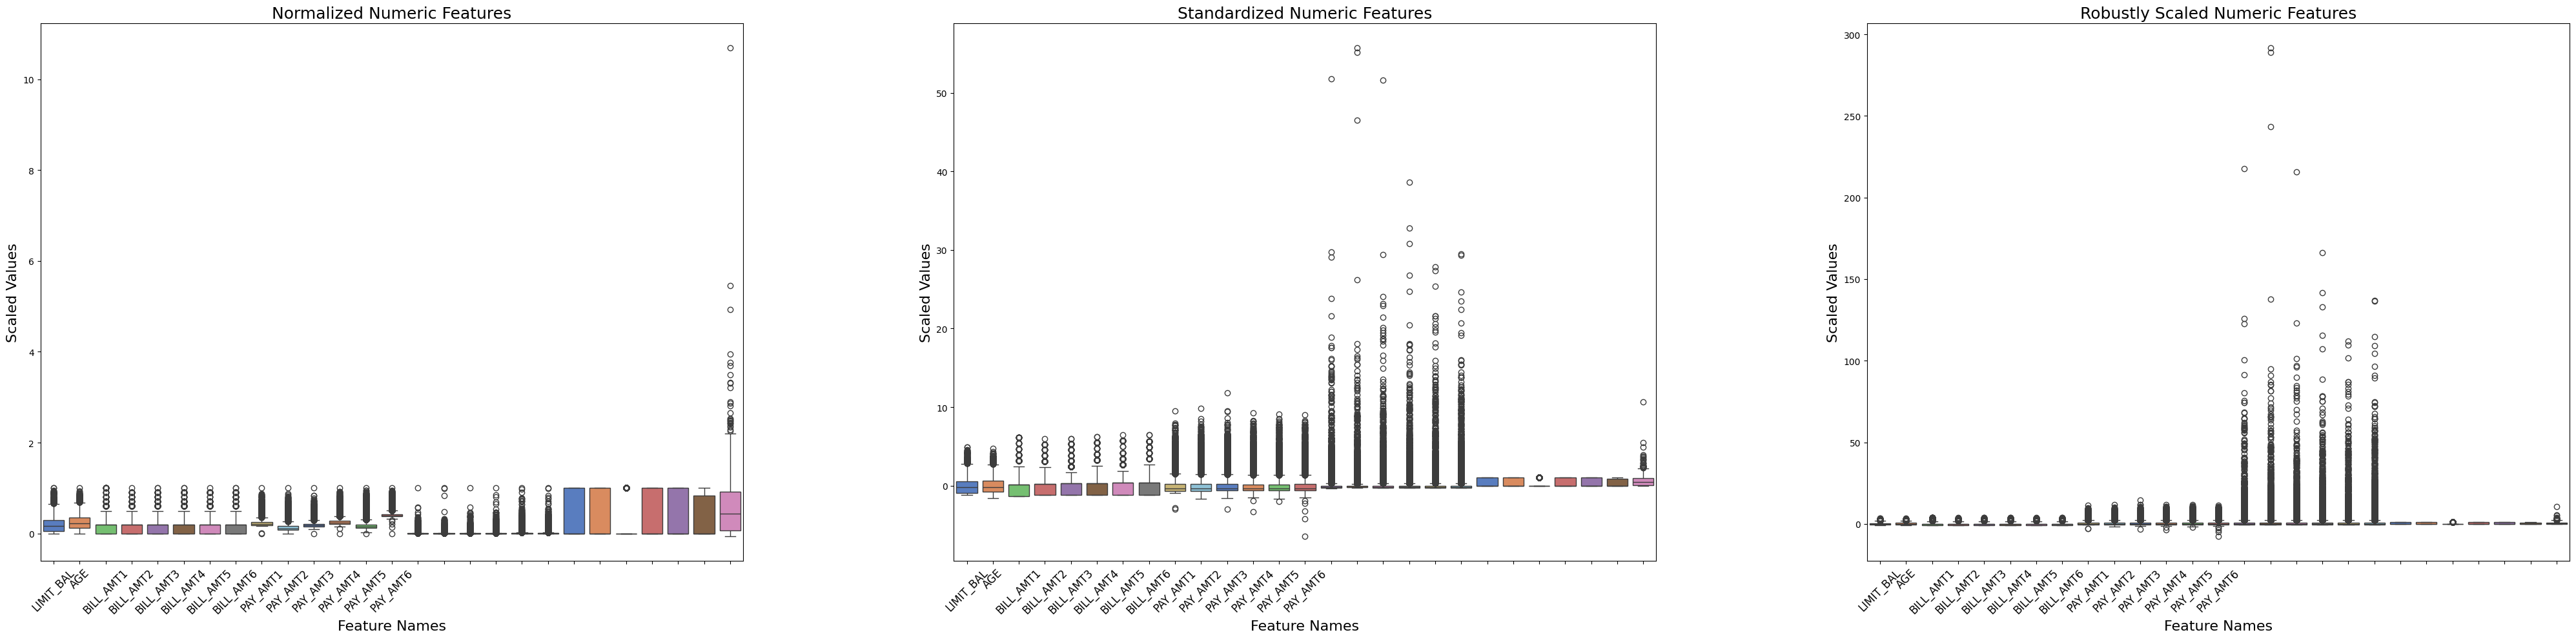

In [91]:
# Create a large figure to accommodate the detailed plots
fig, axs = plt.subplots(1, 3, figsize=(40, 10))  # Increased figure size

# Normalized data plot
sns.boxplot(data=X_train_norm, ax=axs[0], palette='muted')
axs[0].set_title('Normalized Numeric Features', fontsize=18)
axs[0].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[0].set_xlabel('Feature Names', fontsize=16)
axs[0].set_ylabel('Scaled Values', fontsize=16)

# Standardized data plot
sns.boxplot(data=X_train_std, ax=axs[1], palette='muted')
axs[1].set_title('Standardized Numeric Features', fontsize=18)
axs[1].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[1].set_xlabel('Feature Names', fontsize=16)
axs[1].set_ylabel('Scaled Values', fontsize=16)

# Robustly scaled data plot
sns.boxplot(data=X_train_rob, ax=axs[2], palette='muted')
axs[2].set_title('Robustly Scaled Numeric Features', fontsize=18)
axs[2].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[2].set_xlabel('Feature Names', fontsize=16)
axs[2].set_ylabel('Scaled Values', fontsize=16)

# Adjust layout spacing to prevent overlap and ensure everything is visible
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)  

# Save the figure
plt.savefig('images/scaling_comparison_large.svg')
plt.show()

## PCA

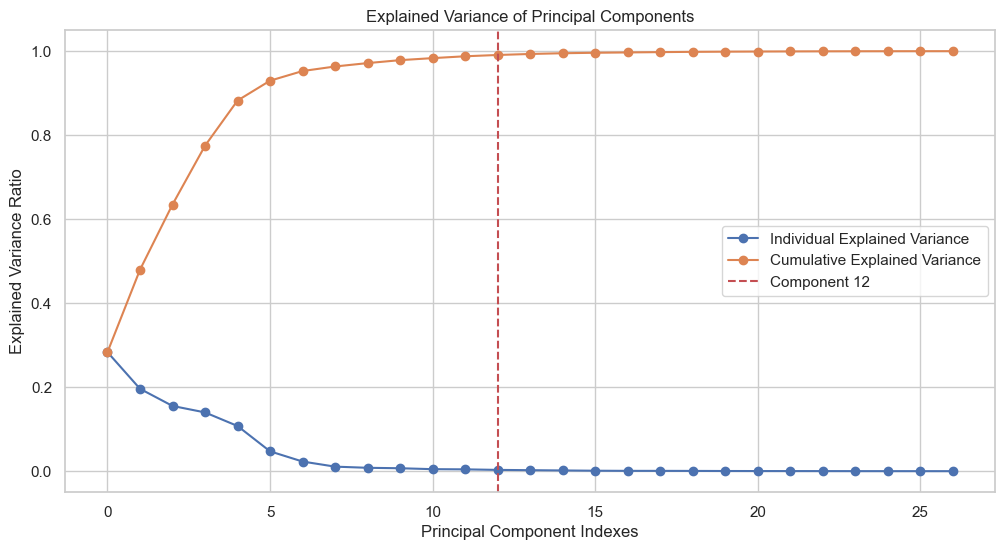

In [92]:
from sklearn.decomposition import PCA

pc = len(X_train_norm.columns)  # number of columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

# Reset to default matplotlib settings with Seaborn color enhancements
sns.set(style="whitegrid", color_codes='pastel')

# Create the plot
plt.figure(figsize=(12,6))  # Adjusted size for better visibility
plt.grid(True)
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o', label="Individual Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label="Cumulative Explained Variance")
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.axvline(12, color='r', linestyle='--', label='Component 12')  # Move axvline before tight_layout
plt.legend()


In [93]:
# Assuming `pca` and `pc` are already defined with PCA results
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['Cumulative Explained Variance'])

# Format directly to percentages in one step without intermediate columns
cumsum_df['Cumulative Explained Variance'] = cumsum_df['Cumulative Explained Variance'].apply(lambda x: f"{x * 100:.2f}%")

# Display the DataFrame transposed for better visibility of headers and first 15 components
display_df = cumsum_df.T.iloc[:, :15]
display_df

PC1     PC2     PC3     PC4     PC5     PC6  \
Cumulative Explained Variance  28.34%  47.96%  63.49%  77.49%  88.25%  92.97%   

                                  PC7     PC8     PC9    PC10    PC11    PC12  \
Cumulative Explained Variance  95.27%  96.35%  97.16%  97.86%  98.35%  98.79%   

                                 PC13    PC14    PC15  
Cumulative Explained Variance  99.09%  99.33%  99.51%

In [94]:
# used X_train features using robuust scaling
# Number of principal components
pc = 12

# Initialize PCA with 12 components
pca = PCA(n_components=pc)

# Fit PCA on normalized training data and transform both training and testing datasets
X_train = pd.DataFrame(pca.fit_transform(X_train_rob),
                       columns=['PC' + str(i) for i in range(1, pc+1)])
X_test = pd.DataFrame(pca.transform(X_test_rob),
                      columns=['PC' + str(i) for i in range(1, pc+1)])

# Display the first five rows of the transformed training dataset
X_train.head()

PC1       PC2        PC3       PC4       PC5       PC6        PC7  \
0  6.116863 -2.502205  -1.628692  1.148873  0.135691  0.462629 -10.279005   
1  3.526458  2.423260  -1.985855 -0.285035 -6.853290 -7.809046   2.193449   
2  4.834462 -2.662947 -12.267233 -7.618439  7.991262  1.149838  -1.347572   
3 -0.926171 -0.316620   0.478639  3.093386  1.779019 -0.387691   2.363131   
4 -3.303145  0.708220   0.423540 -0.367357  0.043147 -0.208643   0.786017   

        PC8       PC9      PC10      PC11      PC12  
0 -2.271327 -0.838944 -0.281919 -1.358495  0.149265  
1 -1.196751 -0.594343  0.642367 -0.674657 -0.158630  
2 -0.128072 -1.074558  1.480041  1.677942  0.167810  
3 -1.383162 -0.401992 -0.172315  0.081145  0.834384  
4 -0.905055  0.037063  1.666046  0.229421  0.110173

## Handling class imbalance problem

In [95]:
# Calculate class counts
class_count = y_train.value_counts().sort_index()

# Create DataFrame with meaningful index names
# Ensure that class_count indices match the intended new indices
if 0 in class_count and 1 in class_count:
    class_count_df = pd.DataFrame({
        'Number': [class_count[0], class_count[1]],
    }, index=['Non-defaulters', 'Defaulters'])
else:
    # Handle cases where one of the classes might not exist
    missing_classes = {0: 0, 1: 0}
    missing_classes.update(class_count)
    class_count_df = pd.DataFrame({
        'Number': [missing_classes[0], missing_classes[1]],
    }, index=['Non-defaulters', 'Defaulters'])

# Calculate percentage
class_count_df['Percentage'] = (class_count_df['Number'] / class_count_df['Number'].sum() * 100).astype(str) + '%'

# Print results
print('Training set class proportion')
print(class_count_df)

Training set class proportion
                Number           Percentage
Non-defaulters   17246   77.68468468468468%
Defaulters        4954  22.315315315315313%


In [96]:
from imblearn.under_sampling import ClusterCentroids

# Assuming X_train and y_train are defined and are your feature and target datasets respectively
# Initialize ClusterCentroids with a random state for reproducibility
oversample = ClusterCentroids(random_state=24)

# Apply undersampling
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

# Compute class counts directly with value_counts, ensuring correct indices
class_counts = y_train_cc.value_counts()
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': (class_counts / class_counts.sum() * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels

print('Training set class proportion after Cluster Centroid Undersampling')
print(class_count_df)

Training set class proportion after Cluster Centroid Undersampling
                Number Percentage
Non-defaulters    4954      50.0%
Defaulters        4954      50.0%


In [97]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are defined
# Initialize SMOTE with a random state for reproducibility
oversample = SMOTE(random_state=24)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# Calculate class counts and directly compute percentages
class_counts = y_train_smote.value_counts()
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': (class_counts / class_counts.sum() * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels


# Output the class proportions after SMOTE oversampling
print('Training set class proportion after SMOTE Oversampling')
print(class_count_df)

Training set class proportion after SMOTE Oversampling
                Number Percentage
Non-defaulters   17246      50.0%
Defaulters       17246      50.0%


In [98]:
from imblearn.over_sampling import KMeansSMOTE

# Assuming X_train and y_train are properly defined
# Initialize KMeansSMOTE with a very low cluster_balance_threshold and a random state for reproducibility
oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)

# Apply KMeansSMOTE to the training data
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

# Calculate class counts using value_counts which automatically aligns the indices correctly
class_counts = y_train_ksmote.value_counts().sort_index()

# Create a DataFrame with calculated percentages
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': ((class_counts / class_counts.sum()) * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels


# Output the class proportions after KMeansSMOTE oversampling
print('Training set class proportion after K-means SMOTE Oversampling')
print(class_count_df)


Training set class proportion after K-means SMOTE Oversampling
                Number Percentage
Non-defaulters   17246     49.99%
Defaulters       17251     50.01%


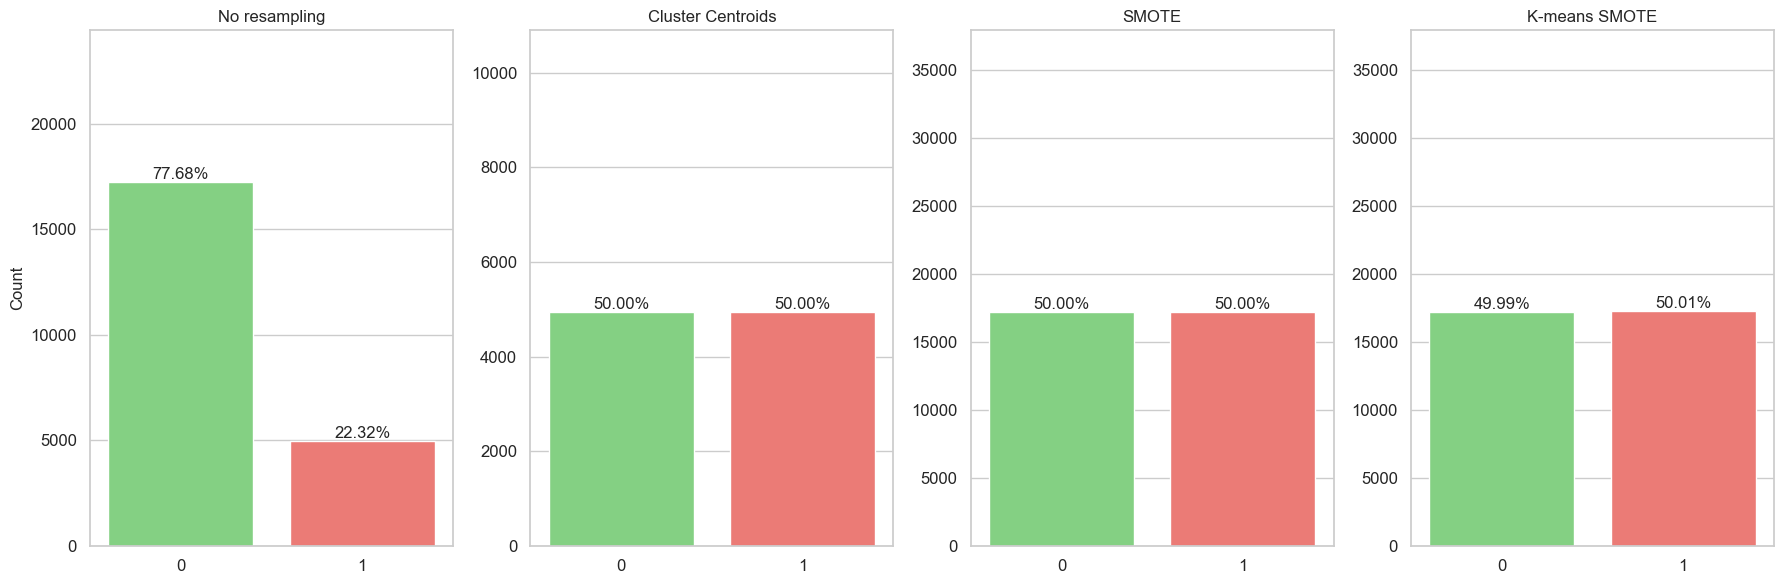

In [99]:
y_list = [y_train, y_train_cc, y_train_smote, y_train_ksmote]
y_list_labels = ['No resampling', 'Cluster Centroids', 'SMOTE', 'K-means SMOTE']

plt.figure(figsize=(18, 6))  # Adjusted for better visibility

for idx, (value, label) in enumerate(zip(y_list, y_list_labels)):
    plt.subplot(1, 4, idx + 1)
    graph_target = sns.countplot(x=value, palette=['#77DD76', '#FF6962'])
    plt.title(label)
    plt.xlabel('')
    plt.ylabel('Count' if idx == 0 else '')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Annotate each bar with the percentage
    for p in graph_target.patches:
        height = p.get_height() or 0  # Use 0 if height is None (no bar)
        percentage = f'{100 * height / value.size:.2f}%'  # Calculate percentage
        plt.text(p.get_x() + p.get_width() / 2, height, percentage, ha="center", va="bottom", fontsize=12)

    plt.ylim(0, value.size * 1.1)  # Scale y-axis to fit annotations

plt.tight_layout()
plt.savefig('images/resamplingDataset.svg')
plt.show()

### Function to Plot Model Performance Summary

In [100]:
def plot_summary(results, resampling_names, y_test, y_pred):
    """Plots F1-scores and confusion matrix for different resampling methods."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    # Bar chart for F1-scores
    f1_scores = pd.DataFrame({
        'F1 Score': results,
        'Resampling Method': resampling_names
    })
    sns.barplot(data=f1_scores, x='F1 Score', y='Resampling Method', palette='Greens_r', ax=ax1)
    ax1.set_title('F1 Score by Resampling Method')
    ax1.set_xlabel('F1 Score')
    ax1.set_ylabel('')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels')

    plt.tight_layout()
    plt.show()


### Function to Evaluate and Plot Test Scores

In [101]:
def evaluate_model(model, X_test, y_test, plot=True):
    """Evaluates the model on test data and optionally plots additional diagnostics."""
    # Model predictions
    y_pred = model.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Print test scores
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc_score:.2f}")

    if plot:
        plt.figure(figsize=(12, 5))
        ax1 = plt.subplot(121)
        plot_confusion_matrix(model, X_test, y_test, cmap='Greens', ax=ax1)

        ax2 = plt.subplot(122)
        plot_roc_curve(model, X_test, y_test, ax=ax2)
        plt.tight_layout()
        plt.show()

    return accuracy, precision, recall, f1, auc_score


###  Pipeline Function for Model Training and Evaluation

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def run_model_pipeline(model, params, oversampler=None, plot=False):
    """
    Runs a full model training and evaluation pipeline with optional resampling and hyperparameter tuning.

    Args:
        model (estimator): The machine learning model to train.
        params (dict): Hyperparameters to tune.
        X_train (DataFrame): Training features.
        y_train (Series): Training labels.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing labels.
        oversampler (function, optional): The oversampling technique to apply.
        plot (bool, optional): If True, plots model evaluation metrics.

    Returns:
        tuple: Contains model evaluation scores, predictions, and actual test labels.
    """
    # Determine training and test data based on whether oversampling is applied
    if oversampler and oversampler != 'raw':
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
        X_test_resampled = X_test
    elif oversampler == 'raw':
        # Assuming 'raw' means using preprocessed but not resampled data
        X_train_resampled = X_train_rob.copy()  # Scaled or preprocessed training data
        y_train_resampled = y_train.copy()
        X_test_resampled = X_test_rob.copy()  # Corresponding test data
    else:
        # No resampling, use the data as is with PCA
        X_train_resampled = X_train.copy()
        y_train_resampled = y_train
        X_test_resampled = X_test

    # Initialize and run GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=5, n_jobs=-1, verbose=True)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Output best hyperparameter settings and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score: {grid_search.best_score_:.2f}")

    # Evaluate the best estimator on the test set
    y_pred = grid_search.best_estimator_.predict(X_test_resampled)
    f1 = f1_score(y_test, y_pred)

    # Plot results if required
    if plot:
        plot_test_scores(grid_search.best_estimator_, X_test_resampled, y_test)

    # Return the model's test scores and the predictions for the best model
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1,
        'auc_score': roc_auc_score(y_test, y_pred)
    }, y_pred, y_test

# Helper function to plot test scores and metrics
def plot_test_scores(model, X_test, y_test):
    """Plots confusion matrix and ROC curve for the given model and test data."""
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_confusion_matrix(model, X_test, y_test, ax=axs[0], cmap='Greens', normalize='true')
    plot_roc_curve(model, X_test, y_test, ax=axs[1])
    plt.tight_layout()
    plt.show()


Logistic Regression with Raw data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 10.0}
Best cross-validation F1 score: 0.37
Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1.0}
Best cross-validation F1 score: 0.17
Logistic Regression with PCA + SMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1.0}
Best cross-validation F1 score: 0.63
Logistic Regression with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1.0}
Best cross-validation F1 score: 0.70
Logistic Regression with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.001}
Best cross-validation F1 score: 0.80


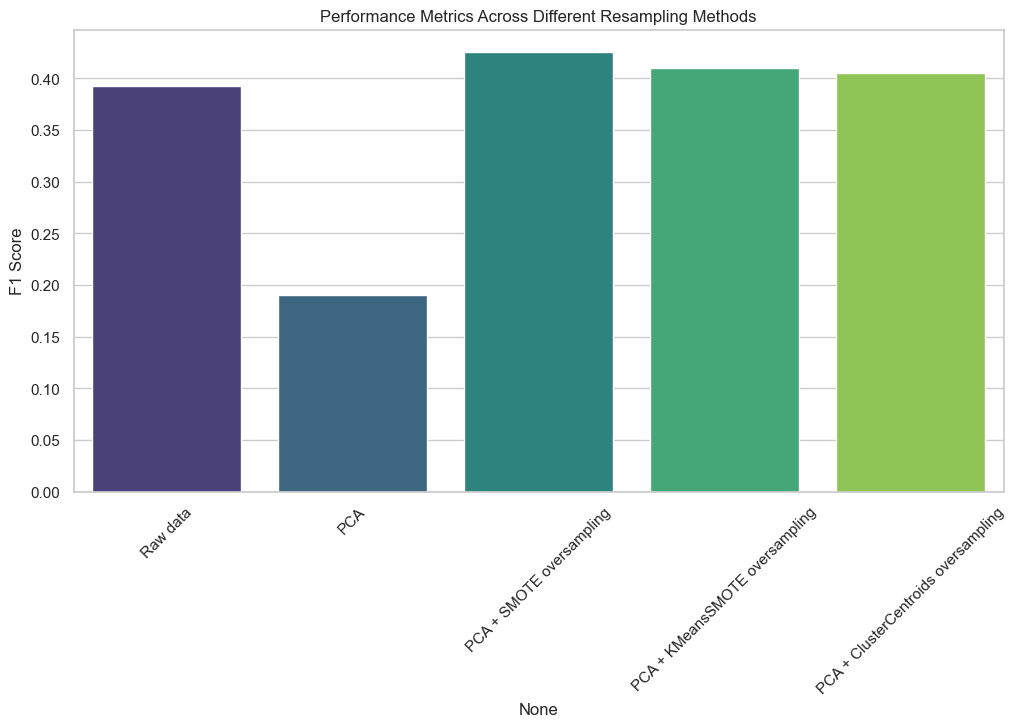

                                     Accuracy    Recall  Precision  F1-score  \
Raw data                             0.809215  0.276802   0.677037  0.392949   
PCA                                  0.791380  0.110236   0.708171  0.190776   
PCA + SMOTE oversampling             0.605864  0.655360   0.315452  0.425900   
PCA + KMeansSMOTE oversampling       0.687340  0.487583   0.354158  0.410296   
PCA + ClusterCentroids oversampling  0.431834  0.867353   0.264304  0.405149   

                                          AUC  
Raw data                             0.619444  
PCA                                  0.548596  
PCA + SMOTE oversampling             0.623506  
PCA + KMeansSMOTE oversampling       0.616139  
PCA + ClusterCentroids oversampling  0.587068  


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


# Define the oversampling methods and names
oversample_methods = [
    'raw',  # Placeholder for raw data
    None,  # Placeholder for data processed with PCA but no oversampling
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]
oversample_names = [
    'Raw data',
    'PCA',
    'PCA + SMOTE oversampling',
    'PCA + KMeansSMOTE oversampling',
    'PCA + ClusterCentroids oversampling'
]

# Initialize dictionary to store scores
scores_lr = {
    'Accuracy': [0.0] * len(oversample_methods),
    'Recall': [0.0] * len(oversample_methods),
    'Precision': [0.0] * len(oversample_methods),
    'F1-score': [0.0] * len(oversample_methods),
    'AUC': [0.0] * len(oversample_methods)
}

# Hyperparameters for Logistic Regression
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

# Loop through each oversampling method and train model
for idx, oversample in enumerate(oversample_methods):
    print(f"Logistic Regression with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = run_model_pipeline(LogisticRegression(random_state=24, max_iter=1000),
                                              params_lr,
                                              oversample)
    scores_lr['Accuracy'][idx] = scores['accuracy']
    scores_lr['Recall'][idx] = scores['recall']
    scores_lr['Precision'][idx] = scores['precision']
    scores_lr['F1-score'][idx] = scores['f1_score']
    scores_lr['AUC'][idx] = scores['auc_score']

# Create DataFrame from scores
scores_lr_df = pd.DataFrame(scores_lr, index=oversample_names)

# Plot and save the summary of results
plt.figure(figsize=(12, 6))
sns.barplot(data=scores_lr_df, x=scores_lr_df.index, y="F1-score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Performance Metrics Across Different Resampling Methods")
plt.ylabel("F1 Score")
plt.savefig("images/summaryLogReg.svg")
plt.show()

# Display scores DataFrame
print(scores_lr_df)


### SVM

In [143]:
from sklearn.svm import SVC

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
def run_model_pipeline(model, params, oversampler=None, plot=False):
    """
    Runs a full model training and evaluation pipeline with optional resampling and hyperparameter tuning.

    Args:
        model (estimator): The machine learning model to train.
        params (dict): Hyperparameters to tune.
        X_train (DataFrame): Training features.
        y_train (Series): Training labels.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing labels.
        oversampler (function, optional): The oversampling technique to apply.
        plot (bool, optional): If True, plots model evaluation metrics.

    Returns:
        tuple: Contains model evaluation scores, predictions, and actual test labels.
    """
    # Determine training and test data based on whether oversampling is applied
    if oversampler and oversampler != 'raw':
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    elif oversampler == 'raw':
        X_train_resampled = X_train.copy()
        y_train_resampled = y_train.copy()
    else:
        X_train_resampled = X_train.copy()
        y_train_resampled = y_train.copy()

    # Initialize and run GridSearchCV
    # grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=3, n_jobs=-1, verbose=True)
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions = params,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
    # grid_search.fit(X_train_resampled, y_train_resampled)
    randomized_search.fit(X_train_resampled, y_train_resampled)

    # Output best hyperparameter settings and score
    print(f"Best parameters: {randomized_search.best_params_}")
    print(f"Best cross-validation F1 score: {randomized_search.best_score_:.2f}")

    # Evaluate the best estimator on the test set
    y_pred = randomized_search.best_estimator_.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # Plot results if required
    if plot:
        plot_test_scores(randomized_search.best_estimator_, X_test, y_test)

    # Return the model's test scores and the predictions for the best model
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1,
        'auc_score': roc_auc_score(y_test, y_pred)
    }, y_pred, y_test

# Helper function to plot test scores and metrics
def plot_test_scores(model, X_test, y_test):
    """Plots confusion matrix and ROC curve for the given model and test data."""
    from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_confusion_matrix(model, X_test, y_test, ax=axs[0], cmap='Greens', normalize='true')
    plot_roc_curve(model, X_test, y_test, ax=axs[1])
    plt.tight_layout()
    plt.show()


In [147]:
# Define the oversampling methods and their names
oversample_methods = {
    'raw': None,
    'PCA': None,  # Assuming PCA is already applied to X_train and X_test
    'SMOTE': SMOTE(random_state=24),
    'KMeansSMOTE': KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24),
    'ClusterCentroids': ClusterCentroids(random_state=24)
}

oversample_names = ['Raw data', 'PCA', 'PCA + SMOTE oversampling', 'PCA + KMeansSMOTE oversampling', 'PCA + ClusterCentroids oversampling']

# Initialize a dictionary to hold the scores
scores_svm = {
    'Accuracy': [0.0 for _ in range(len(oversample_methods))],
    'Recall': [0.0 for _ in range(len(oversample_methods))],
    'Precision': [0.0 for _ in range(len(oversample_methods))],
    'F1-score': [0.0 for _ in range(len(oversample_methods))],
    'AUC': [0.0 for _ in range(len(oversample_methods))]
}

# Define the SVM parameters for grid search
# params_svm = {
#     'C': [1e-1, 1e0, 1e1, 1e2],
#     'kernel': ['rbf', 'poly'],
#     'gamma': [1e-1, 'scale']
# }

# Hyperparameter Grid
params_svm = {'C':[ 1e0,1e1, 1e2] ,
              'kernel': ['rbf','poly']
             }

In [148]:
# # Create an instance of the support vector classifier
# svm=SVC(probability=True)

# # Grid search
# svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
#                        cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# # fitting model
# svm_grid.fit(X_train, y_train)

In [149]:
# # Perform the pipeline for each oversampling method
# for idx, oversample in enumerate(oversample_method):
#     print(f"Support Vector Machine with {oversample_names[idx]}")
#     scores, y_pred_max, y_test_max = run_model_pipeline(SVC(), params_svm, oversample)
#     scores_svm['Accuracy'][idx] = scores[0]
#     scores_svm['Recall'][idx] = scores[1]
#     scores_svm['Precision'][idx] = scores[2]
#     scores_svm['F1-score'][idx] = scores[3]
#     scores_svm['AUC'][idx] = scores[4]
    
# # Create a DataFrame from the scores
# scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)
# print(scores_svm_df)

In [150]:
# Perform the pipeline for each oversampling method
for idx, oversample in enumerate(oversample_method):
    print(f"Support Vector Machine with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = run_model_pipeline(SVC(), params_svm, oversample)
    scores_svm['Accuracy'][idx] = scores['accuracy']
    scores_svm['Recall'][idx] = scores['precision']
    scores_svm['Precision'][idx] = scores['recall']
    scores_svm['F1-score'][idx] = scores['f1_score']
    scores_svm['AUC'][idx] = scores['auc_score']
    
    
# Create a DataFrame from the scores
scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)
print(scores_svm_df)

Support Vector Machine with Raw data
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameters: {'kernel': 'rbf', 'C': 100.0}
Best cross-validation F1 score: 0.72
Support Vector Machine with PCA
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameters: {'kernel': 'rbf', 'C': 100.0}
Best cross-validation F1 score: 0.72
Support Vector Machine with PCA + SMOTE oversampling
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=10.0, kernel=poly; total time= 1.4min
[CV] END ................................C=10.0, kernel=poly; total time= 1.4min
[CV] END .................................C=1.0, kernel=poly; total time=  17.6s
[CV] END ................................C=10.0, kernel=poly; total time= 1.0min
[CV] END ..................................C=1.0, kernel=rbf; total time=   5.7s
[CV] END ................................C=100.0, kernel=rbf; total time=   7.3s
[CV] END ..................................C

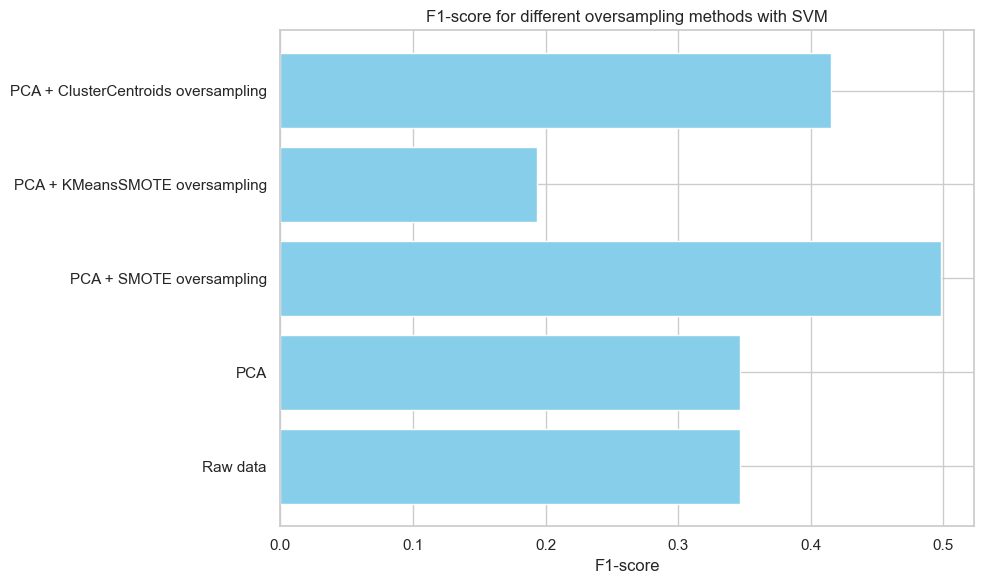

[CV] END .................................C=10.0, kernel=rbf; total time=   1.1s
[CV] END ................................C=10.0, kernel=poly; total time=   1.2s
[CV] END .................................C=1.0, kernel=poly; total time=   1.4s
[CV] END .................................C=1.0, kernel=poly; total time=   6.1s
[CV] END ...............................C=100.0, kernel=poly; total time=16.2min
[CV] END ..................................C=1.0, kernel=rbf; total time=   1.1s
[CV] END ................................C=100.0, kernel=rbf; total time=   1.4s
[CV] END .................................C=1.0, kernel=poly; total time=   0.8s
[CV] END ................................C=100.0, kernel=rbf; total time=   0.8s
[CV] END ................................C=10.0, kernel=poly; total time=   3.0s
[CV] END ..................................C=1.0, kernel=rbf; total time=   0.9s
[CV] END ...............................C=100.0, kernel=poly; total time=   3.1s
[CV] END ...................

In [151]:
# Function to plot the summary
def plot_summary(f1_scores, oversample_names, y_pred_max, y_test_max):
    plt.figure(figsize=(10, 6))
    plt.barh(oversample_names, f1_scores, color='skyblue')
    plt.xlabel('F1-score')
    plt.title('F1-score for different oversampling methods with SVM')
    plt.tight_layout()
    plt.savefig("summarySVM.svg")
    plt.show()

# Plot the F1-scores
plot_summary(scores_svm_df["F1-score"], oversample_names, None, None)

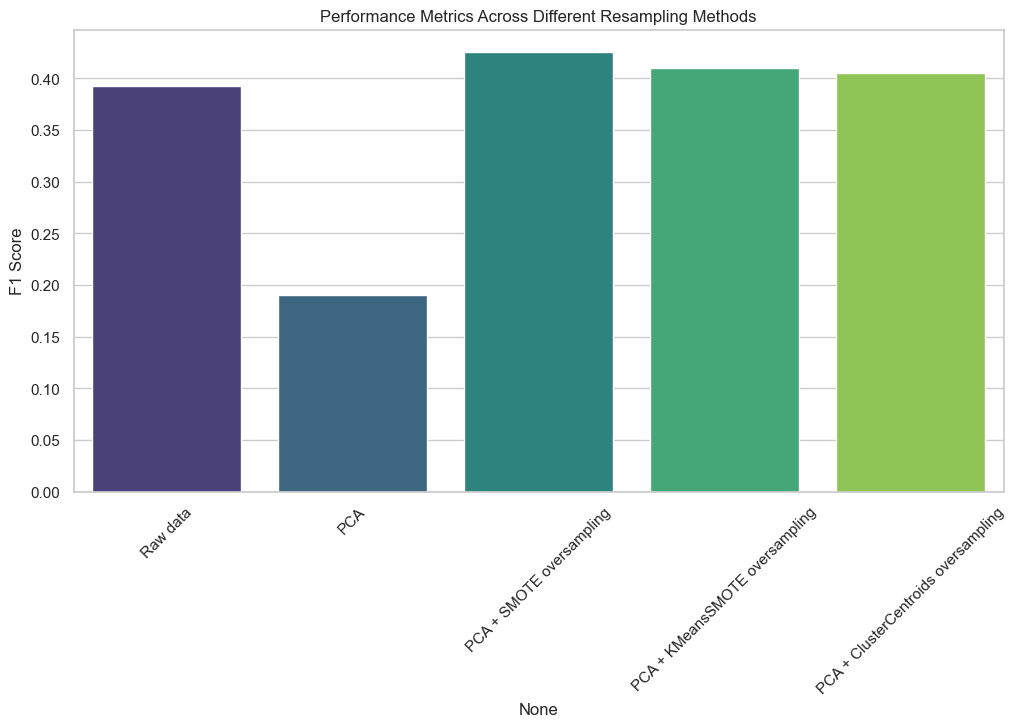

                                     Accuracy    Recall  Precision  F1-score  \
Raw data                             0.801919  0.655987   0.235615  0.346702   
PCA                                  0.801919  0.655987   0.235615  0.346702   
PCA + SMOTE oversampling             0.694231  0.392932   0.680194  0.498115   
PCA + KMeansSMOTE oversampling       0.753141  0.356678   0.132647  0.193377   
PCA + ClusterCentroids oversampling  0.479260  0.276979   0.828589  0.415175   

                                          AUC  
Raw data                             0.600068  
PCA                                  0.600068  
PCA + SMOTE oversampling             0.689227  
PCA + KMeansSMOTE oversampling       0.531976  
PCA + ClusterCentroids oversampling  0.603773  


In [152]:
# Plot and save the summary of results
plt.figure(figsize=(12, 6))
sns.barplot(data=scores_lr_df, x=scores_lr_df.index, y="F1-score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Performance Metrics Across Different Resampling Methods")
plt.ylabel("F1 Score")
plt.savefig("images/summarySVM.svg")
plt.show()

# Display scores DataFrame
print(scores_svm_df)

### Decision Tree

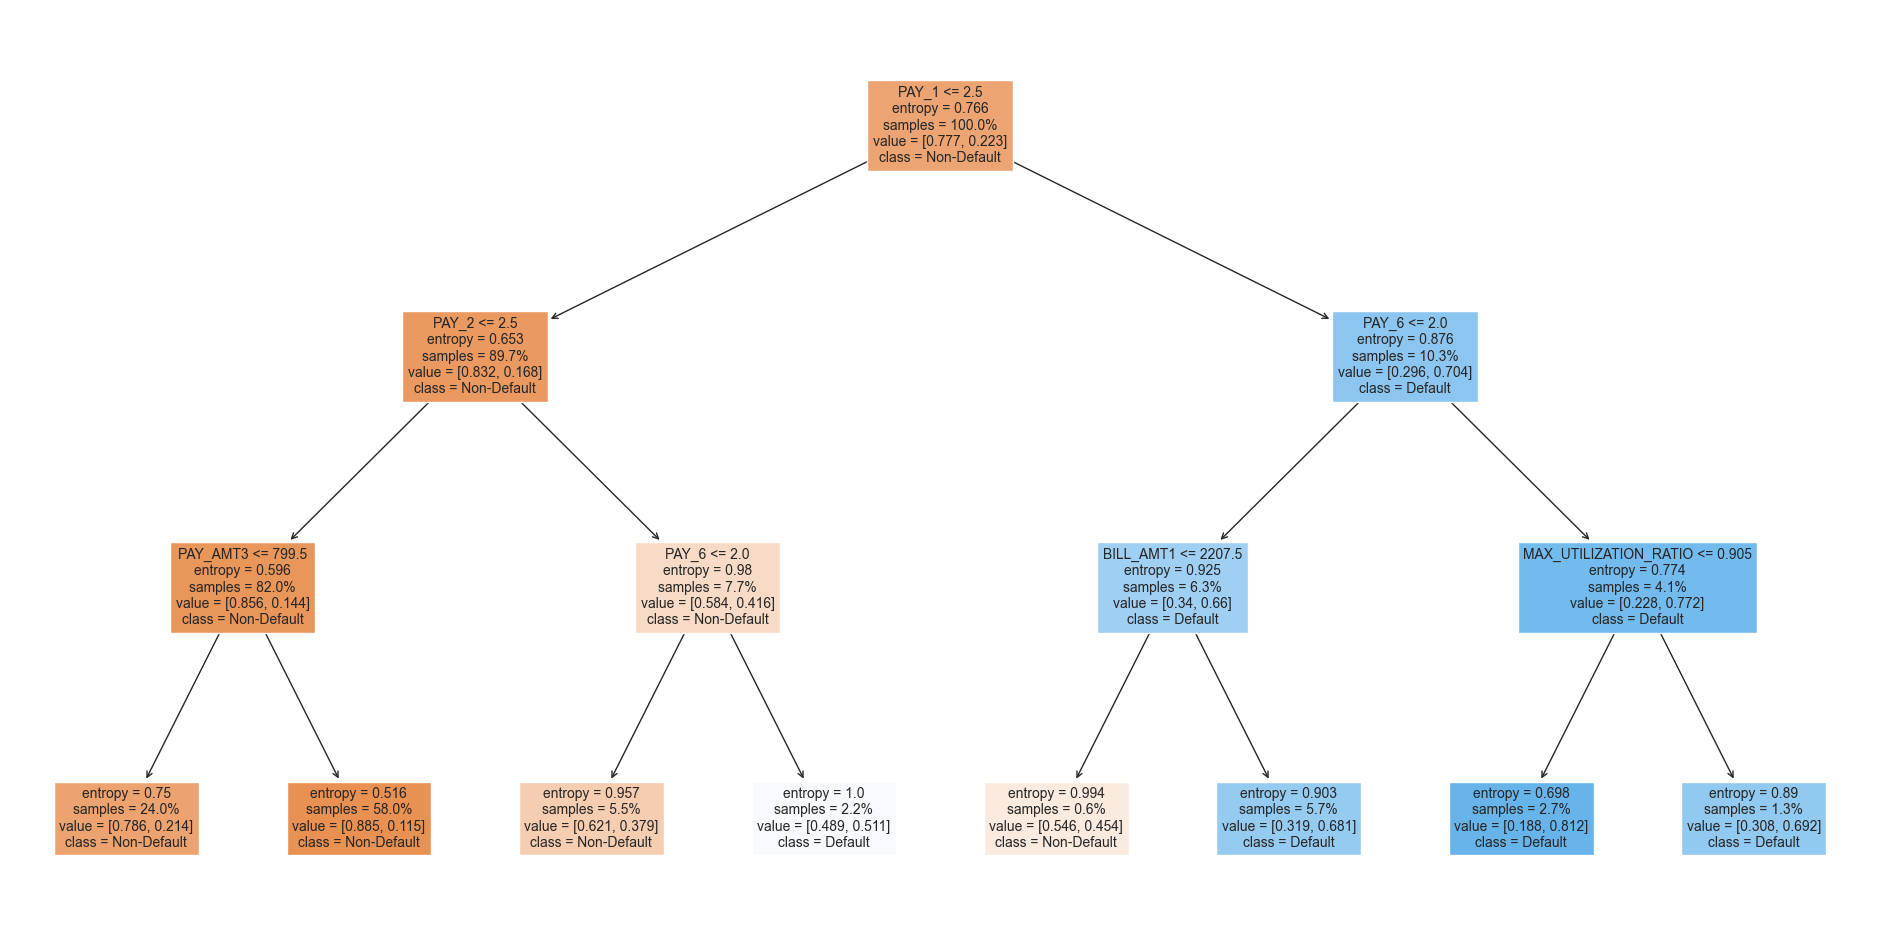

In [153]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', max_features=None)
clf.fit(X_train_raw, y_train)  # Assuming X_train_raw and y_train are already defined

# Set up the plot with specified size
plt.figure(figsize=(24, 12))

# Plot the tree
plot_tree(decision_tree=clf,
          feature_names=X_train_raw.columns, 
          class_names=['Non-Default', 'Default'],
          filled=True, 
          proportion=True, 
          fontsize=10)  # Adjust font size for better readability if needed

plt.show()


In [155]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_tree_test_scores(model, X_test, y_test, X_test_raw=None, oversample=None, plot=False):
    # Determine the test set to use
    if oversample == 'raw' and X_test_raw is not None:
        X_test_s = X_test_raw.copy()
    else:
        X_test_s = X_test.copy()

    # Predict using the model
    y_pred = model.predict(X_test_s)

    # Calculate various test scores
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)

    # Print test scores to the console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")

    # Plot results if requested
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15, 4))
        
        # Feature importance plot
        if hasattr(model, 'best_estimator_') and hasattr(model.best_estimator_, 'feature_importances_'):
            feature_importances = model.best_estimator_.feature_importances_
            feature_names = X_test_s.columns
            tmp = pd.DataFrame({'Feature': feature_names, 'Feature importance': feature_importances})
            tmp = tmp.sort_values(by='Feature importance', ascending=False)
            sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
            axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
        
        # Confusion matrix plot
        ConfusionMatrixDisplay.from_estimator(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        
        # Precision-recall curve plot
        no_skill = len(y_test[y_test == 1]) / len(y_test)
        axs[2].plot(recall, precision, marker='.', label='Model')
        axs[2].axhline(no_skill, linestyle='--', label='No Skill')
        axs[2].set_xlabel('Recall')
        axs[2].set_ylabel('Precision')
        axs[2].set_ylim([-0.05, 1.05])
        axs[2].legend(loc='upper right')

        plt.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))

        # Confusion matrix plot
        ConfusionMatrixDisplay.from_estimator(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])

        # Precision-recall curve plot
        no_skill = len(y_test[y_test == 1]) / len(y_test)
        axs[1].plot(recall, precision, marker='.', label='Model')
        axs[1].axhline(no_skill, linestyle='--', label='No Skill')
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_ylim([-0.05, 1.05])
        axs[1].legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    return test_acc, test_recall, test_precision, test_f1, test_auc


In [156]:
# !pip uninstall scikit-learn
# pip install scikit-learn

### Random Forest Classifier

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def tree_pipeline(model, params, X_train, y_train, X_test, y_test, X_train_raw=None, X_test_raw=None, oversample=None, plot=False):
    # Initialize the maximum F1 score and corresponding predictions
    max_f1 = 0
    y_pred_max = None
    y_test_max = None

    # Handle oversampling and data preparation
    if oversample:
        if oversample == 'raw' and X_train_raw is not None and X_test_raw is not None:
            X_train_s, y_train_s = X_train_raw.copy(), y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s, y_train_s = X_train.copy(), y_train.copy()
        X_test_f1 = X_test.copy()

    # Perform grid search to find the best parameters
    gridsearch = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=True
    )
    gridsearch.fit(X_train_s, y_train_s)
    
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")

    # Evaluate the model and plot test scores if requested
    test_scores = plot_tree_test_scores(gridsearch, X_test, y_test, X_test_raw, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_

    # Save best configuration
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred), 2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1

    return test_scores, y_pred_max, y_test_max


In [158]:
# Define oversample methods and their corresponding names
oversample_method = [
    'raw',
    None, 
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]

oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]

# Initialize scores dictionary
scores_tree = {
    'Accuracy': [0.0] * len(oversample_method),
    'Recall': [0.0] * len(oversample_method),
    'Precision': [0.0] * len(oversample_method),
    'F1-score': [0.0] * len(oversample_method),
    'AUC': [0.0] * len(oversample_method)
}

In [159]:
# Define the plot_summary function
def plot_summary(f1_scores, oversample_names, y_pred_max, y_test_max):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=oversample_names, y=f1_scores, palette='viridis')
    plt.title('F1 Score Summary')
    plt.xlabel('Oversample Method')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

Decision Tree with Raw data
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.4626228136407005
Test Scores:
- Accuracy:	0.8211052560464802
- Recall:	0.3591762568140521
- Precision:	0.6903376018626309
- F1-score:	0.47250996015936253
- AUC:		0.5962337567940907


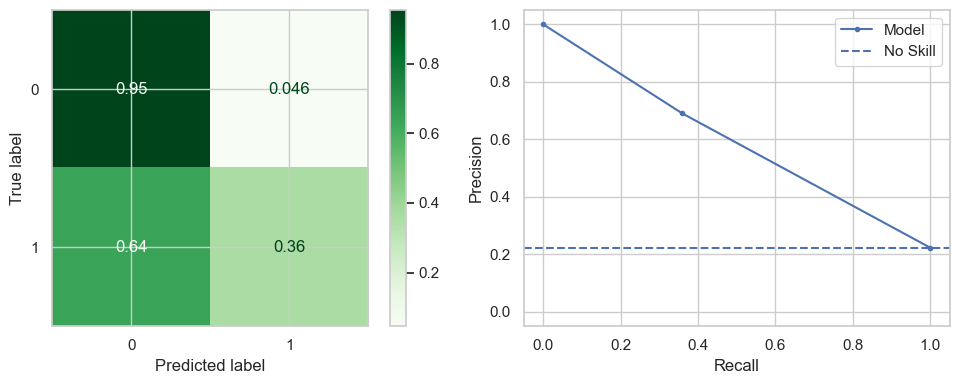

Decision Tree with PCA
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.39052378927251097
Test Scores:
- Accuracy:	0.798946088366437
- Recall:	0.3034524530587523
- Precision:	0.5971394517282479
- F1-score:	0.40240963855421685
- AUC:		0.5279881561497493


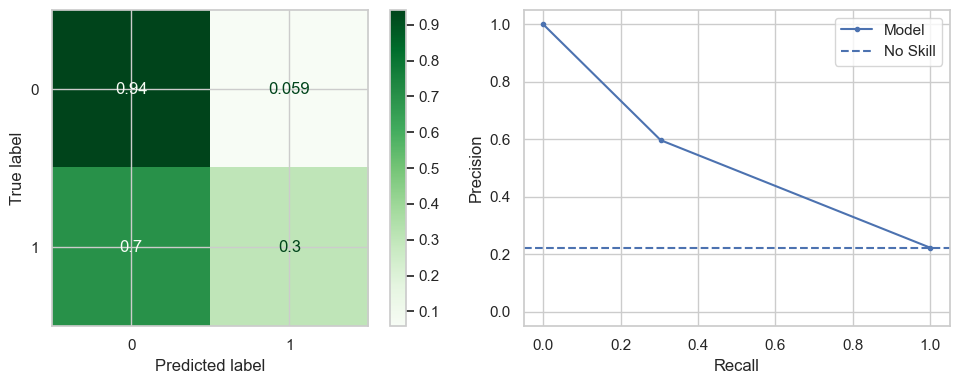

Decision Tree with PCA + SMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 50}
Best validation score:	0.7537174044898156
Test Scores:
- Accuracy:	0.6588298878529928
- Recall:	0.4760751059963658
- Precision:	0.321340964840556
- F1-score:	0.38369538686844035
- AUC:		0.45714608433077003


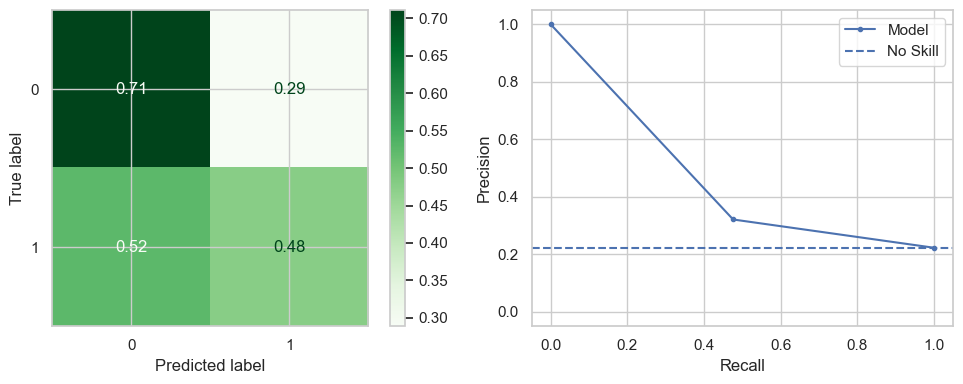

Decision Tree with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 20}
Best validation score:	0.7597629555485175
Test Scores:
- Accuracy:	0.7088231320091879
- Recall:	0.4058146577831617
- Precision:	0.3633405639913232
- F1-score:	0.3834048640915594
- AUC:		0.45085243861322544


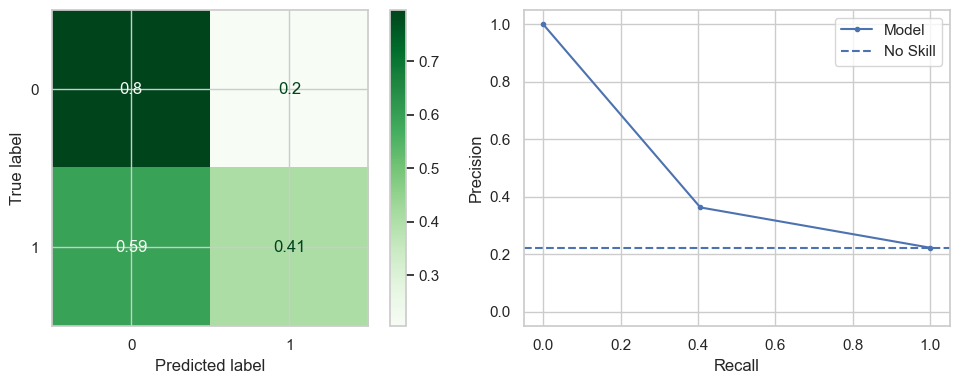

Decision Tree with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.7971095378736132
Test Scores:
- Accuracy:	0.5142548304283205
- Recall:	0.7952755905511811
- Precision:	0.287308533916849
- F1-score:	0.42211863044526604
- AUC:		0.5641268142945475


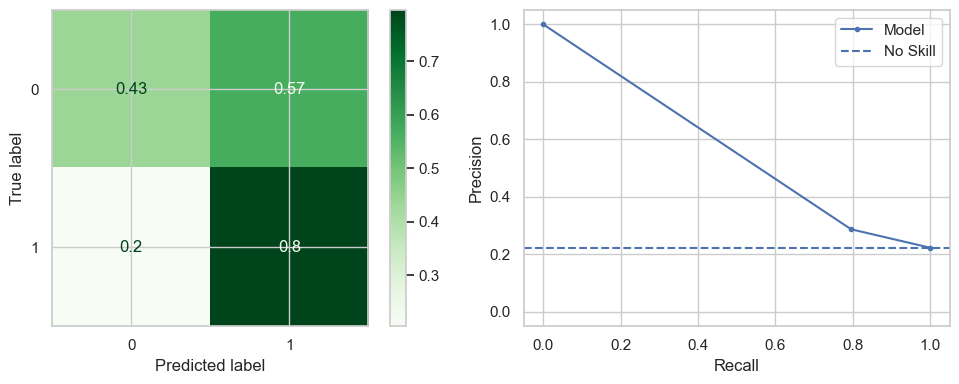

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.821105  0.359176   0.690338  0.472510   
PCA                                  0.798946  0.303452   0.597139  0.402410   
PCA + SMOTE oversampling             0.658830  0.476075   0.321341  0.383695   
PCA + KMeansSMOTE oversampling       0.708823  0.405815   0.363341  0.383405   
PCA + ClusterCentroids oversampling  0.514255  0.795276   0.287309  0.422119   

                                          AUC  
Raw data                             0.596234  
PCA                                  0.527988  
PCA + SMOTE oversampling             0.457146  
PCA + KMeansSMOTE oversampling       0.450852  
PCA + ClusterCentroids oversampling  0.564127

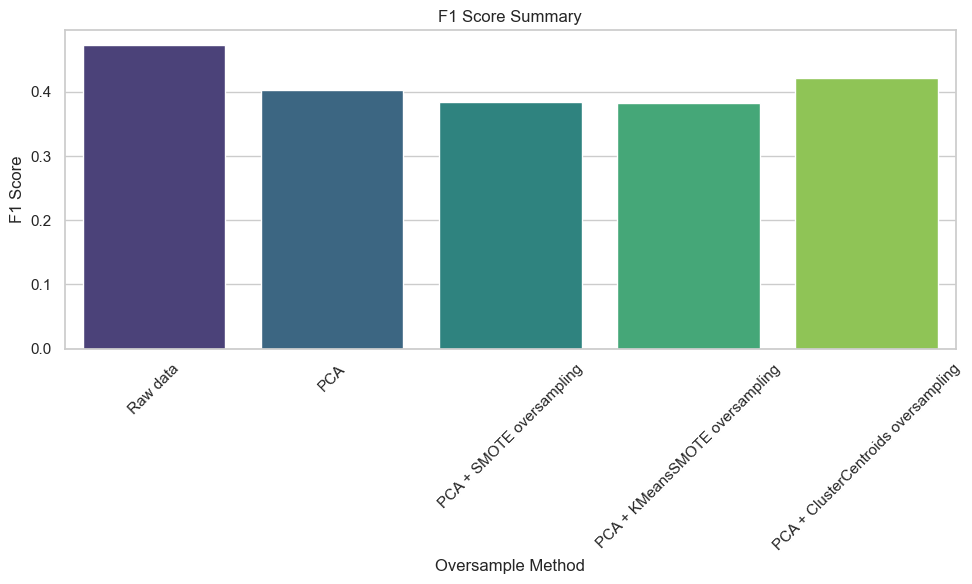

In [160]:
# Define the parameter grid for the Decision Tree
params_tree = {'max_depth': [5, 10, 20, 30, 50]}

# Run the pipeline for each oversample method and collect scores
for idx, oversample in enumerate(oversample_method):
    print(f"Decision Tree with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(
        DecisionTreeClassifier(criterion='entropy', max_features=None, random_state=24),
        params_tree,
        X_train, y_train, X_test, y_test,
        X_train_raw, X_test_raw,
        oversample
    )
    scores_tree['Accuracy'][idx] = scores[0]
    scores_tree['Recall'][idx] = scores[1]
    scores_tree['Precision'][idx] = scores[2]
    scores_tree['F1-score'][idx] = scores[3]
    scores_tree['AUC'][idx] = scores[4]

# Convert scores to DataFrame
scores_rf_tree = pd.DataFrame(data=scores_tree, index=oversample_names)

# Plot and save the summary
plot = plot_summary(scores_rf_tree["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryTree.svg")
scores_rf_tree

In [67]:
# Define oversample methods and their corresponding names
oversample_method = [
    'raw',
    None, 
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]

oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]

# Initialize scores dictionary
scores_rf = {
    'Accuracy': [0.0] * len(oversample_method),
    'Recall': [0.0] * len(oversample_method),
    'Precision': [0.0] * len(oversample_method),
    'F1-score': [0.0] * len(oversample_method),
    'AUC': [0.0] * len(oversample_method)
}


Random Forest with Raw data
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.47072545375035296
Test Scores:
- Accuracy:	0.8192136197811106
- Recall:	0.3882495457298607
- Precision:	0.6615067079463365
- F1-score:	0.48931297709923666
- AUC:		0.5931121492675


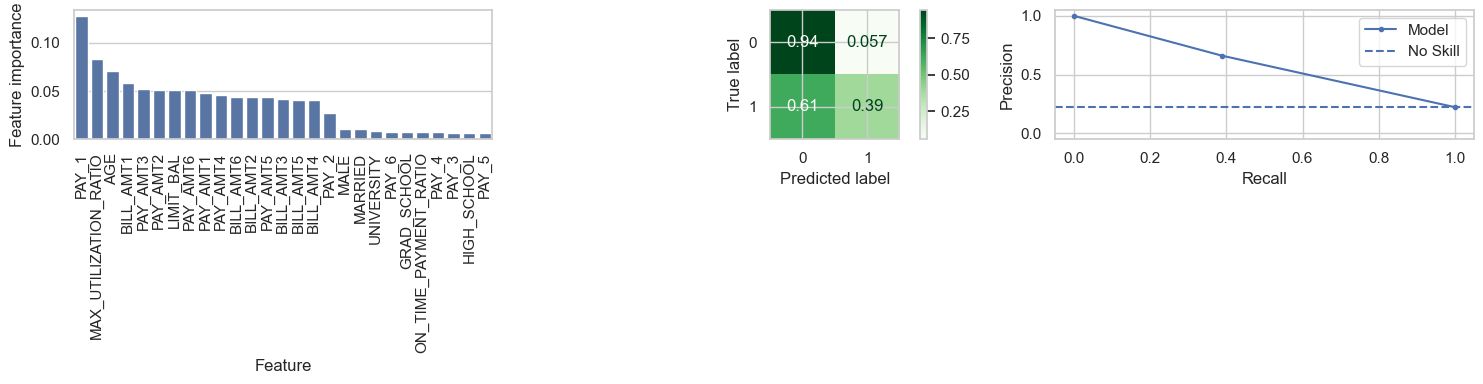

Random Forest with PCA
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.39699587668349057
Test Scores:
- Accuracy:	0.8016484258883935
- Recall:	0.3076923076923077
- Precision:	0.60984393757503
- F1-score:	0.40901771336553944
- AUC:		0.5359874173235756


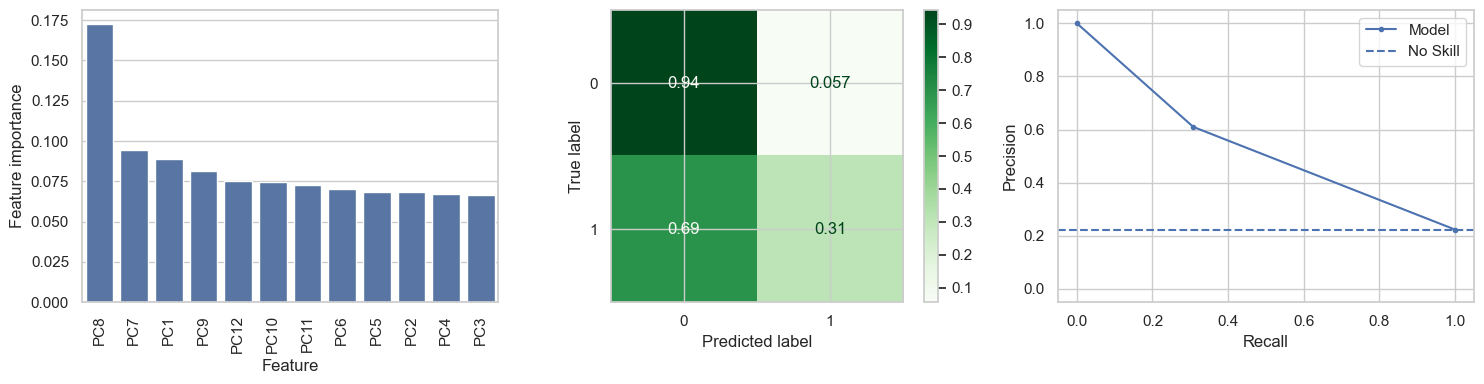

Random Forest with PCA + SMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 200}
Best validation score:	0.8545884524320189
Test Scores:
- Accuracy:	0.7748952844210242
- Recall:	0.5003028467595396
- Precision:	0.495500899820036
- F1-score:	0.4978902953586498
- AUC:		0.5536375846801405


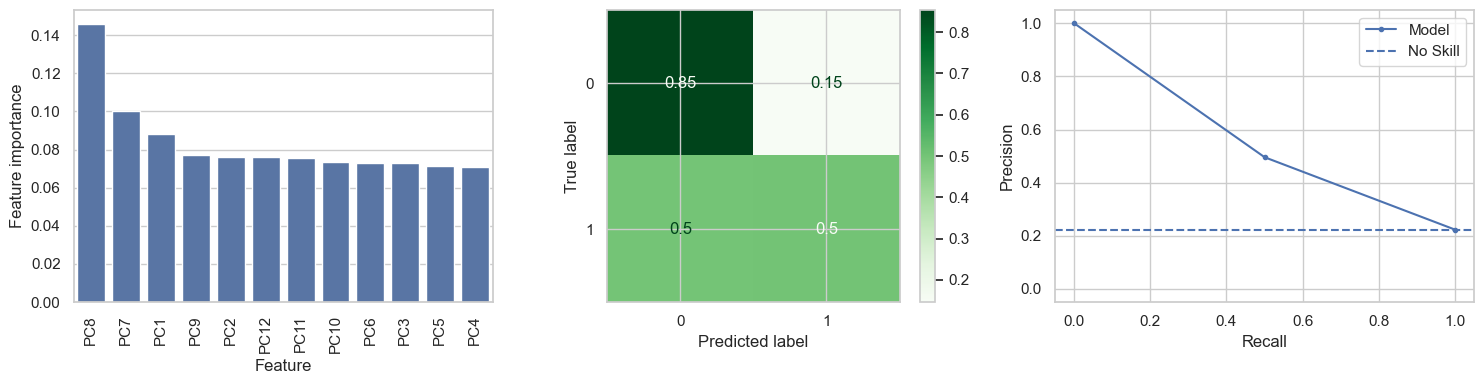

Random Forest with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 100}
Best validation score:	0.7983515078427039
Test Scores:
- Accuracy:	0.7851641670044589
- Recall:	0.3567534827377347
- Precision:	0.5273052820053715
- F1-score:	0.42557803468208094
- AUC:		0.513776443579498


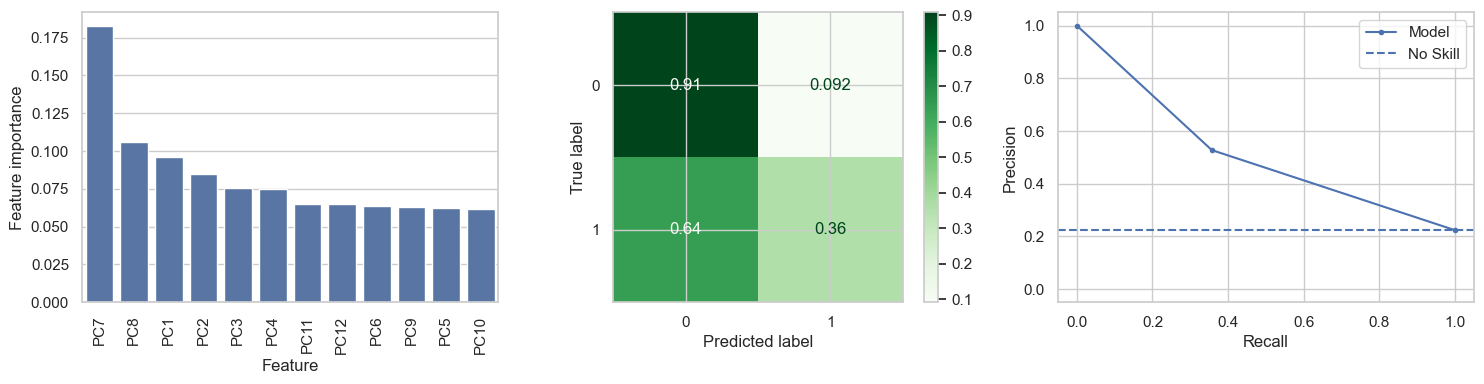

Random Forest with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.8055059592895647
Test Scores:
- Accuracy:	0.5258748817727334
- Recall:	0.8001211387038158
- Precision:	0.29355555555555557
- F1-score:	0.42952365469029424
- AUC:		0.5691326316858267


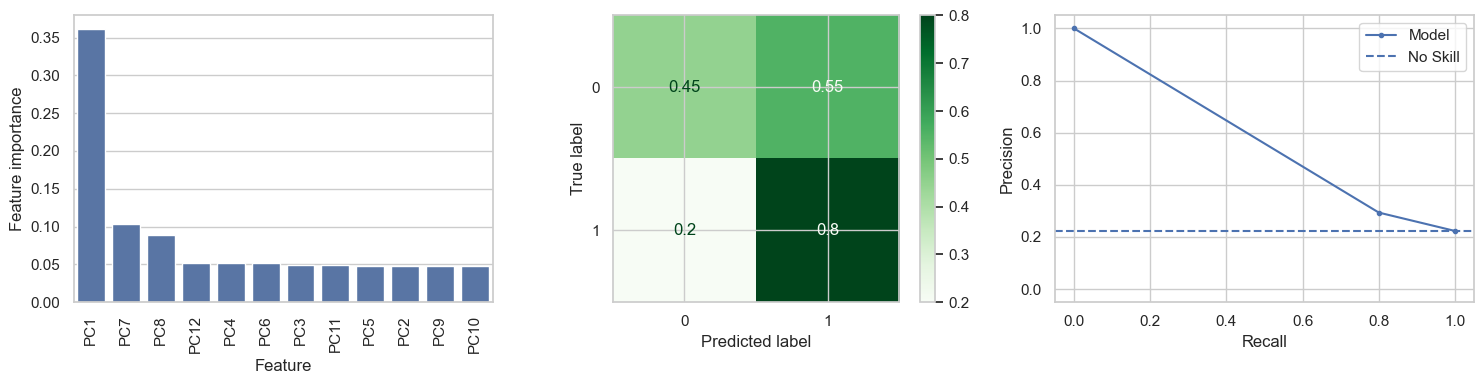

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.819214  0.388250   0.661507  0.489313   
PCA                                  0.801648  0.307692   0.609844  0.409018   
PCA + SMOTE oversampling             0.774895  0.500303   0.495501  0.497890   
PCA + KMeansSMOTE oversampling       0.785164  0.356753   0.527305  0.425578   
PCA + ClusterCentroids oversampling  0.525875  0.800121   0.293556  0.429524   

                                          AUC  
Raw data                             0.593112  
PCA                                  0.535987  
PCA + SMOTE oversampling             0.553638  
PCA + KMeansSMOTE oversampling       0.513776  
PCA + ClusterCentroids oversampling  0.569133

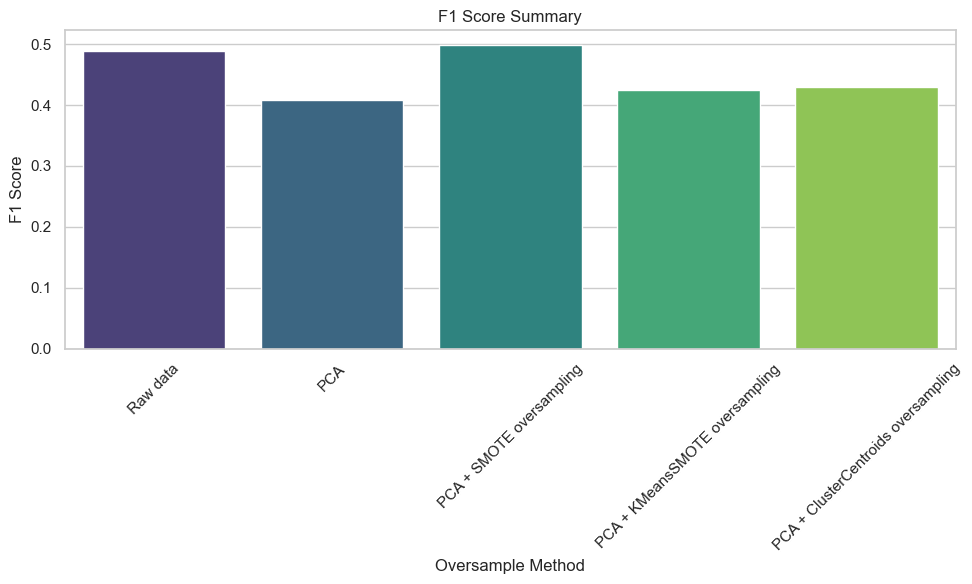

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for the Random Forest
params_rf = {'n_estimators': [10, 50, 100, 200], 
             'max_features': [None, 'sqrt']}

# Run the pipeline for each oversample method and collect scores
for idx, oversample in enumerate(oversample_method):
    print(f"Random Forest with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(
        RandomForestClassifier(criterion='entropy', random_state=24, n_jobs=-1),
        params_rf,
        X_train, y_train, X_test, y_test,
        X_train_raw, X_test_raw,
        oversample,
        plot=True
    )
    scores_rf['Accuracy'][idx] = scores[0]
    scores_rf['Recall'][idx] = scores[1]
    scores_rf['Precision'][idx] = scores[2]
    scores_rf['F1-score'][idx] = scores[3]
    scores_rf['AUC'][idx] = scores[4]

# Convert scores to DataFrame
scores_rf_df = pd.DataFrame(data=scores_rf, index=oversample_names)

# Plot and save the summary
plot = plot_summary(scores_rf_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryRF.svg")
scores_rf_df

## Gradient Boosting

In [129]:
def run_model_pipeline(model, params,oversample_methods, oversample_names, plot=False):
    """
    Runs a full model training and evaluation pipeline with optional resampling and hyperparameter tuning.

    Args:
        model (estimator): The machine learning model to train.
        params (dict): Hyperparameters to tune.
        X_train (DataFrame): Training features.
        y_train (Series): Training labels.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing labels.
        oversample_methods (list): List of oversampling methods to apply.
        oversample_names (list): List of names corresponding to the oversampling methods.
        plot (bool, optional): If True, plots model evaluation metrics.

    Returns:
        dict: A dictionary containing model evaluation scores for each oversampling method.
    """
    # Initialize scores dictionary
    scores = {
        'Accuracy': [0.0] * len(oversample_methods),
        'Recall': [0.0] * len(oversample_methods),
        'Precision': [0.0] * len(oversample_methods),
        'F1-score': [0.0] * len(oversample_methods),
        'AUC': [0.0] * len(oversample_methods)
    }

    # Iterate over each oversample method
    for idx, oversampler in enumerate(oversample_methods):
        if oversampler == 'raw':
            # Use the original data
            X_train_resampled = X_train_rob.copy()
            y_train_resampled = y_train.copy()
            X_test_resampled = X_test_rob.copy()
        else:
            # Use PCA-transformed data
            pca = PCA(n_components=min(X_train.shape[1], 30))  # Adjust the number of components as needed
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)

            if oversampler is not None:
                X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_pca, y_train)
            else:
                X_train_resampled = X_train_pca
                y_train_resampled = y_train.copy()
            
            X_test_resampled = X_test_pca

        # Initialize and run RandomizedSearchCV
        randomized_search = RandomizedSearchCV(estimator=model, param_distributions=params,
                                               cv=2, verbose=2, n_jobs=-1, scoring='roc_auc')
        randomized_search.fit(X_train_resampled, y_train_resampled)

        # Output best hyperparameter settings and score
        print(f"Oversampling method: {oversample_names[idx]}")
        print(f"Best parameters: {randomized_search.best_params_}")
        print(f"Best cross-validation ROC AUC score: {randomized_search.best_score_:.2f}")

        # Evaluate the best estimator on the test set
        y_pred = randomized_search.best_estimator_.predict(X_test_resampled)
        f1 = f1_score(y_test, y_pred)

        # Plot results if required
        if plot:
            plot_test_scores(randomized_search.best_estimator_, X_test_resampled, y_test)

        # Store the model's test scores
        scores['Accuracy'][idx] = accuracy_score(y_test, y_pred)
        scores['Recall'][idx] = recall_score(y_test, y_pred)
        scores['Precision'][idx] = precision_score(y_test, y_pred)
        scores['F1-score'][idx] = f1
        scores['AUC'][idx] = roc_auc_score(y_test, y_pred)

    return scores

In [130]:
# Helper function to plot test scores and metrics
def plot_test_scores(model, X_test, y_test):
    """Plots confusion matrix and ROC curve for the given model and test data."""
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[0], cmap='Greens', normalize='true')
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axs[1])
    plt.tight_layout()
    plt.show()

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Oversampling method: Raw data
Best parameters: {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 30, 'learning_rate': 0.01}
Best cross-validation ROC AUC score: 0.78


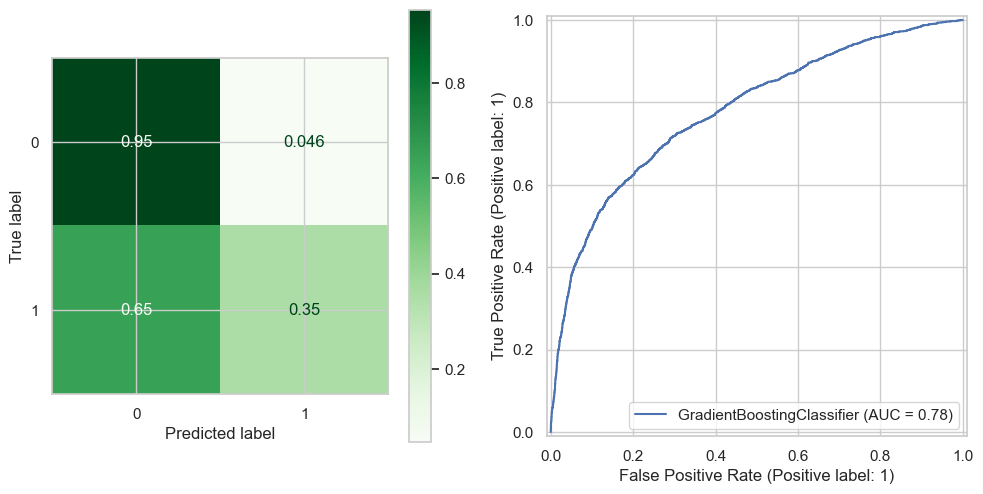

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Oversampling method: PCA
Best parameters: {'n_estimators': 200, 'min_samples_split': 150, 'min_samples_leaf': 50, 'max_depth': 20, 'learning_rate': 0.01}
Best cross-validation ROC AUC score: 0.74


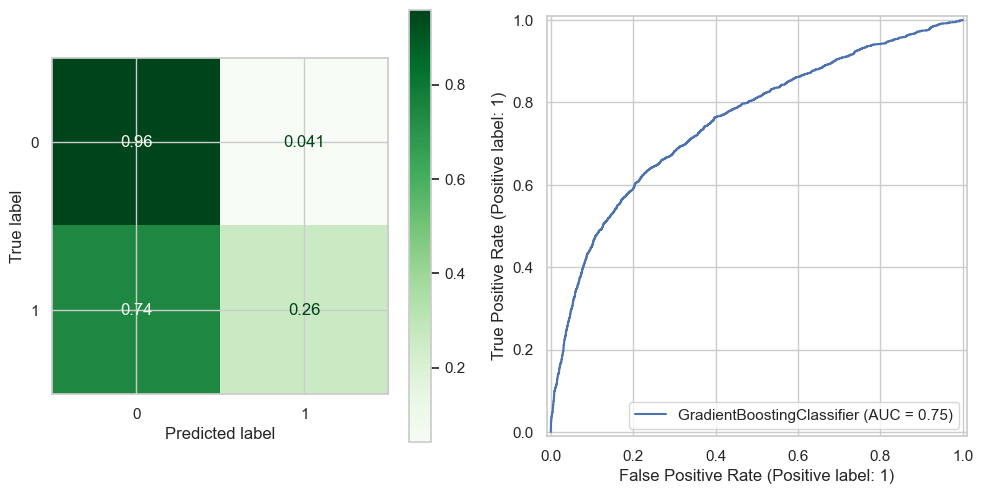

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Oversampling method: PCA + SMOTE oversampling
Best parameters: {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_depth': 30, 'learning_rate': 1}
Best cross-validation ROC AUC score: 0.88


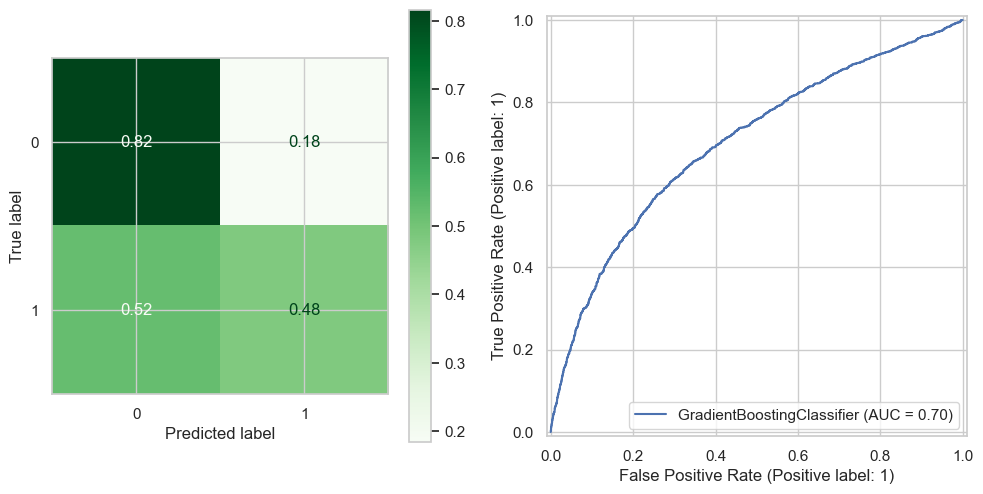

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Oversampling method: PCA + KMeansSMOTE oversampling
Best parameters: {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 20, 'learning_rate': 0.5}
Best cross-validation ROC AUC score: 0.78


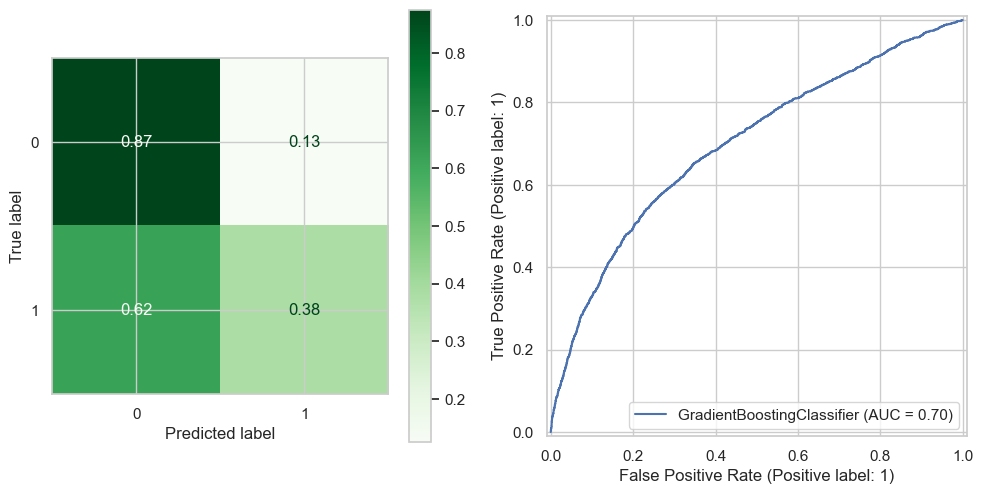

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Oversampling method: PCA + ClusterCentroids oversampling
Best parameters: {'n_estimators': 150, 'min_samples_split': 150, 'min_samples_leaf': 40, 'max_depth': 20, 'learning_rate': 0.01}
Best cross-validation ROC AUC score: 0.87


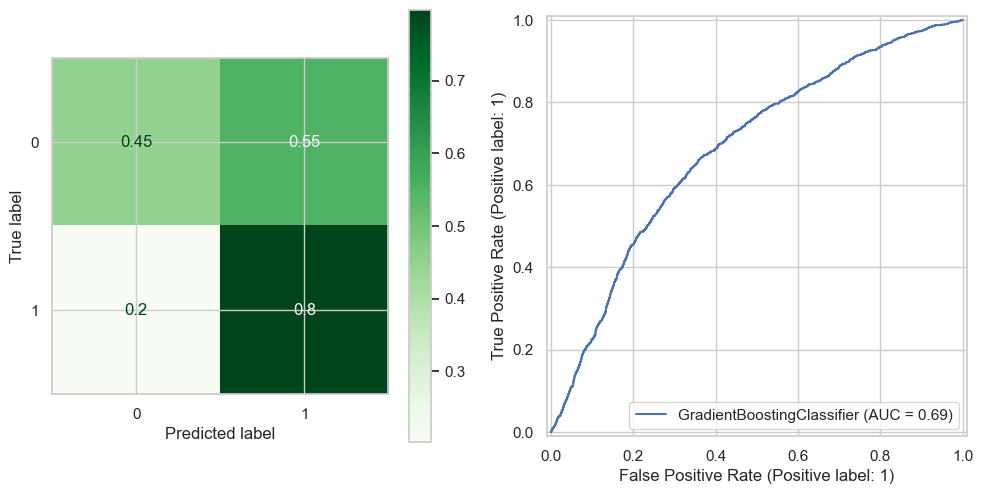

In [131]:
# Define oversample methods and their corresponding names
oversample_method = [
    'raw',
    None, 
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]

oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]

# Initialize scores dictionary
scores_rf = {
    'Accuracy': [0.0] * len(oversample_method),
    'Recall': [0.0] * len(oversample_method),
    'Precision': [0.0] * len(oversample_method),
    'F1-score': [0.0] * len(oversample_method),
    'AUC': [0.0] * len(oversample_method)
}

param_dict = {
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}

gbc = GradientBoostingClassifier(random_state=42)


# Assuming X_train, y_train, X_test, and y_test are already defined

scores_gb_df = run_model_pipeline(gbc, param_dict, oversample_methods=oversample_methods, oversample_names=oversample_names,plot=True)




In [136]:
scores_gb_df

scores_gb_dfs = pd.DataFrame(data=scores_gb_df, index=oversample_names)


In [137]:
scores_gb_dfs

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.819889  0.351302   0.688836  0.465303   
PCA                                  0.802594  0.259237   0.642643  0.369443   
PCA + SMOTE oversampling             0.740711  0.477892   0.427411  0.451244   
PCA + KMeansSMOTE oversampling       0.764626  0.380981   0.466271  0.419333   
PCA + ClusterCentroids oversampling  0.525605  0.797698   0.293057  0.428641   

                                          AUC  
Raw data                             0.652869  
PCA                                  0.608923  
PCA + SMOTE oversampling             0.647033  
PCA + KMeansSMOTE oversampling       0.627882  
PCA + ClusterCentroids oversampling  0.622588

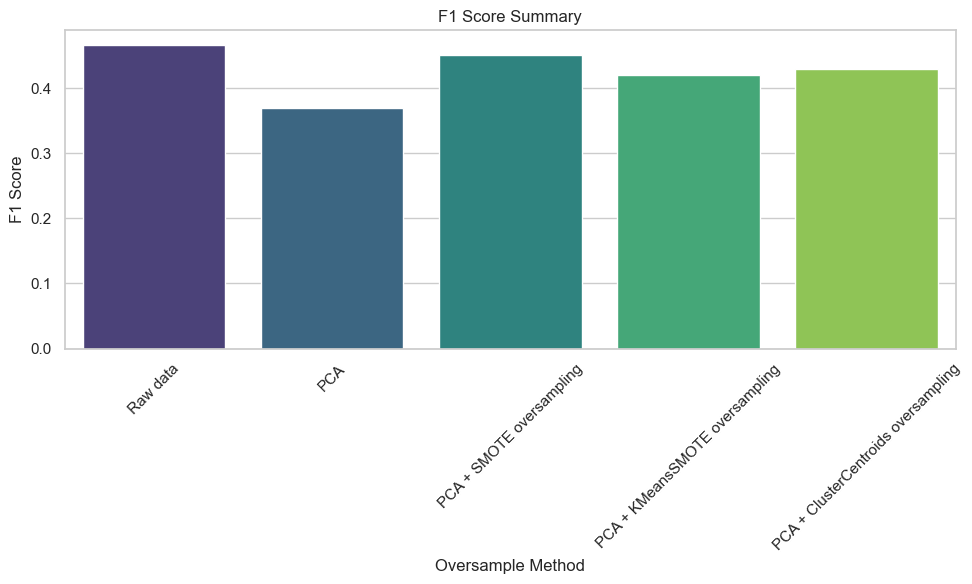

In [164]:
# Plot and save the summary
plot = plot_summary(scores_gb_dfs["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryGB.svg")


In [138]:
# Add the classifier and technique columns
oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]
scores_gb_dfs['Classifier'] = 'Gradient Boosting'
scores_gb_dfs['Technique'] = oversample_names
scores_gb_dfs

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.819889  0.351302   0.688836  0.465303   
PCA                                  0.802594  0.259237   0.642643  0.369443   
PCA + SMOTE oversampling             0.740711  0.477892   0.427411  0.451244   
PCA + KMeansSMOTE oversampling       0.764626  0.380981   0.466271  0.419333   
PCA + ClusterCentroids oversampling  0.525605  0.797698   0.293057  0.428641   

                                          AUC         Classifier  \
Raw data                             0.652869  Gradient Boosting   
PCA                                  0.608923  Gradient Boosting   
PCA + SMOTE oversampling             0.647033  Gradient Boosting   
PCA + KMeansSMOTE oversampling       0.627882  Gradient Boosting   
PCA + ClusterCentroids oversampling  0.622588  Gradient Boosting   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling

## Model Comparisions

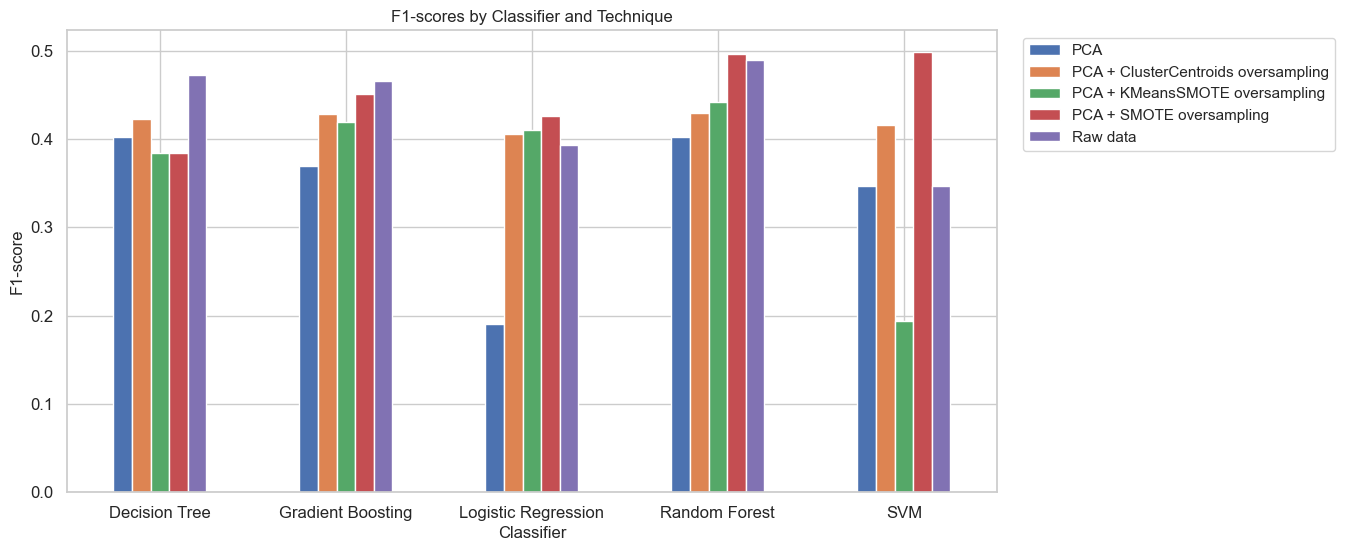

In [163]:
classifiers = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest','Gradient Boosting']
dataframes = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df,scores_gb_dfs]

# classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
# dataframes = [scores_lr_df, scores_rf_tree, scores_rf_df]

for clf, df in zip(classifiers, dataframes):
    df['Classifier'] = clf
    df['Technique'] = df.index

# Combine all DataFrames into one
scores_combined = pd.concat(dataframes, ignore_index=True)

# Plot the F1-scores
ax = scores_combined.set_index(['Technique', 'Classifier']).unstack(0)['F1-score'].plot(kind='bar', 
                                                                                        ylabel='F1-score', 
                                                                                        figsize=(12, 6), 
                                                                                        fontsize=12, 
                                                                                        rot=0)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.title('F1-scores by Classifier and Technique')
plt.show()

In [89]:
scores_lr_df

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.809215  0.276802   0.677037  0.392949   
PCA                                  0.791380  0.110236   0.708171  0.190776   
PCA + SMOTE oversampling             0.605729  0.655360   0.315360  0.425817   
PCA + KMeansSMOTE oversampling       0.687340  0.487583   0.354158  0.410296   
PCA + ClusterCentroids oversampling  0.431834  0.867353   0.264304  0.405149   

                                          AUC           Classifier  \
Raw data                             0.619444  Logistic Regression   
PCA                                  0.548596  Logistic Regression   
PCA + SMOTE oversampling             0.623419  Logistic Regression   
PCA + KMeansSMOTE oversampling       0.616139  Logistic Regression   
PCA + ClusterCentroids oversampling  0.587068  Logistic Regression   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling

In [90]:
scores_rf_tree

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.821105  0.359176   0.690338  0.472510   
PCA                                  0.798946  0.303452   0.597139  0.402410   
PCA + SMOTE oversampling             0.660722  0.480921   0.324346  0.387412   
PCA + KMeansSMOTE oversampling       0.708958  0.406420   0.363686  0.383867   
PCA + ClusterCentroids oversampling  0.576949  0.746214   0.312373  0.440393   

                                          AUC     Classifier  \
Raw data                             0.596234  Decision Tree   
PCA                                  0.527988  Decision Tree   
PCA + SMOTE oversampling             0.460531  Decision Tree   
PCA + KMeansSMOTE oversampling       0.451260  Decision Tree   
PCA + ClusterCentroids oversampling  0.557601  Decision Tree   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling

In [91]:
scores_rf_df

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.819214  0.388250   0.661507  0.489313   
PCA                                  0.801648  0.307692   0.609844  0.409018   
PCA + SMOTE oversampling             0.774895  0.500303   0.495501  0.497890   
PCA + KMeansSMOTE oversampling       0.785164  0.356753   0.527305  0.425578   
PCA + ClusterCentroids oversampling  0.525875  0.800121   0.293556  0.429524   

                                          AUC     Classifier  \
Raw data                             0.593112  Random Forest   
PCA                                  0.535987  Random Forest   
PCA + SMOTE oversampling             0.553638  Random Forest   
PCA + KMeansSMOTE oversampling       0.513776  Random Forest   
PCA + ClusterCentroids oversampling  0.569133  Random Forest   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling

In [114]:
scores_svm_df

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.801919  0.655987   0.235615  0.346702   
PCA                                  0.801919  0.655987   0.235615  0.346702   
PCA + SMOTE oversampling             0.693825  0.392370   0.678982  0.497338   
PCA + KMeansSMOTE oversampling       0.753141  0.356678   0.132647  0.193377   
PCA + ClusterCentroids oversampling  0.479260  0.277069   0.829194  0.415352   

                                          AUC Classifier  \
Raw data                             0.600068        SVM   
PCA                                  0.600068        SVM   
PCA + SMOTE oversampling             0.688535        SVM   
PCA + KMeansSMOTE oversampling       0.531976        SVM   
PCA + ClusterCentroids oversampling  0.603989        SVM   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling

In [140]:
scores_gb_dfs

Accuracy    Recall  Precision  F1-score  \
Raw data                             0.819889  0.351302   0.688836  0.465303   
PCA                                  0.802594  0.259237   0.642643  0.369443   
PCA + SMOTE oversampling             0.740711  0.477892   0.427411  0.451244   
PCA + KMeansSMOTE oversampling       0.764626  0.380981   0.466271  0.419333   
PCA + ClusterCentroids oversampling  0.525605  0.797698   0.293057  0.428641   

                                          AUC         Classifier  \
Raw data                             0.652869  Gradient Boosting   
PCA                                  0.608923  Gradient Boosting   
PCA + SMOTE oversampling             0.647033  Gradient Boosting   
PCA + KMeansSMOTE oversampling       0.627882  Gradient Boosting   
PCA + ClusterCentroids oversampling  0.622588  Gradient Boosting   

                                                               Technique  
Raw data                                                        Raw data  
PCA                                                                  PCA  
PCA + SMOTE oversampling                        PCA + SMOTE oversampling  
PCA + KMeansSMOTE oversampling            PCA + KMeansSMOTE oversampling  
PCA + ClusterCentroids oversampling  PCA + ClusterCentroids oversampling